# Учебный проект 10_Прогноз заболевания сердца у пациентов

## Содержание

* [Описание проекта](#Описание)
* [Импорт библиотек Python](#Импорт)
* [Загрузка данных](#Загрузка)
    * [Предобработка данных](#Задача1_Предобработка)
    * [Исследовательский анализ данных](#Задача1_Исследование)
    * [Корреляционный анализ данных](#Задача1_Корреляция)
    * [Построение моделей прогнозирования удовлетворенности сотрудника рабочим местом](#Задача1_Моделирование)
        * [Подготовка данных и построение пайплайна МО](#Задача1_Моделирование_Пайплайн)
        * [Выбор оптимальной модели](#Задача1_Моделирование_Выбор)
* [Задача 2_Предсказание увольнения сотрудника из компании](#Задача2)
    * [Загрузка данных](#Задача2_Загрузка)
    * [Предобработка данных](#Задача2_Предобработка)
    * [Исследовательский анализ данных](#Задача2_Исследование)
    * [Добавление нового входного признака](#Задача2_ДобавлениеПризнака)
    * [Построение моделей прогнозирования ухода сотрудника](#Задача2_Моделирование)
        * [Подготовка данных и построение пайплайна МО](#Задача2_Моделирование_Пайплайн)
        * [Выбор оптимальной модели](#Задача2_Моделирование_Выбор)
        * [Анализ важности признаков в работе модели](#Задача2_Моделирование_Признаки)
* [Общий вывод](#ОбщийВывод)

На исследовании находятся данные с `информацией о пациентах клиники и наличием у них заболеваний сердца`, которые были взяты из открытого источника Kaggle.


---

`Задача`

1. Разработать и выбрать лучшую модель машинного обучения для **прогноза у пациента высокого или низкого риска поражения сердца**;
2. Разработать **приложение для автоматизированного прогнозирования риска поражения сердца на FastAPI**.

---

`Путь решения`

1. Собрать данные по сотрудникам в следующем ключе:
    * Данные о пациентах клиники - конкретно об их физиологических показателях и образе жизни:
        * Данные для обучения моделей классификации;
        * Данные для тестирования качества моделей.
2. Исследовать датасеты на предмет лучшего понимания сути данных;
3. Провести предобработку значений в наборах данных;
4. Провести исследовательский анализ данных для выявления закономерностей, применимых к последующей настройке моделей МО;
5. Построить и выбрать лучшую модель, которая `выполнит прогноз высокого или низкого риска поражения сердца` (задача может решаться моделями классификации);
6. Оценить качество моделей на метриках. Оценить важность признаков для получения результатов прогноза;
7. Сформировать вывод о подготовленных решениях. Предложить заказчику лучшую модели для решения обозначенной задачи;
8. Подготовить скрипты и библиотеки для автоматизированной обработки данных и построения прогноза в приложении.

---

`Располагаемые данные`

**Данные обучающей и тестовой выборок (медицинские показатели и другая информация о пациентах) - train_data и test_features**

Нормализованные количественные признаки: 
* Age - возраст пациента;
* Cholesterol — содержание холестерина в крови пациента;
* Heart rate — частота сердечных сокращений пациента;
* Exercise Hours Per Week - количество часов физической активности;
* Sedentary Hours Per Day - количество часов в сидячем положении;
* Income - доход пациента;
* BMI - индекс массы тела пациента;
* Sleep Hours Per Day - количество часов сна в день;
* Triglycerides - содержание жиров в теле пациента;
* Blood sugar - содержание сахара в крови;
* CK-MB - содержание креатинкиназы в крови;
* Troponin - содержание тропонина;
* Systolic blood pressure - систолическое кровяное давление;
* Diastolic blood pressure - диастолическое кровяное давление;

Бинарные признаки:
* Diabetes — наличие диабета у пациента;
* Family History — наличие семейной истории сердечных заболеваний у пациента;
* Smoking — наличие привычки курения у пациента;
* Obesity — наличие ожирения у пациента;
* Alcohol Consumption — потребляет ли пациент алкоголь;
* Previous Heart Problems - наличие у пациента прошлых проблем с сердцем;
* Medication use - принимает ли пациент медицинские препараты;
* Gender - пол пациента;
* Heart Attack Risk (Binary) - наличие риска сердечного заболевания (целевой признак);

Категориальные признаки:
* Diet — тип питания пациента;
* Stress Level - уровень стресса пациента;
* Physical Activity Days Per Week - количество дней физической активности в неделю;

Прочие показатели:
* id - уникальный идентификатор пациента;

## Импорт библиотек Python <a class = 'anchor' id = 'Импорт'></a>

1. Импорт библиотек Python:
    * для манипулирования данными;
    * для визуализации данных;
    * для решения задач машинного обучения:
        * модели классификации;
        * метрики оценки эффективности моделей;
        * механизмы отбора данных и подбора параметров моделей;
        * механизмы подготовки данных;
        * механизмы построения пайплайнов;
        * механизм заполнения пустых значений;
        * механизм анализха влияния признаков.
2. Инициализация переменных-констант для последующего использования на этапе построения моделей МО;
3. Формирование вывода по итогам данного этапа.

In [1]:
# импорт библиотек python

# для манипулирования данными
import pandas as pd
# установка параметров для отображения табличных данных
pd.set_option('display.max_columns', 30)
pd.set_option('display.max_info_columns', 30)
pd.set_option('display.max_rows', 5)
pd.set_option('display.max_colwidth', 100)
# установка параметров для отображения числовых значений
pd.set_option('display.float_format', '{:.2f}'.format)
# для работы с массивами данных
import numpy as np

# для визуализации данных
import matplotlib.pyplot as plt
import seaborn as sns
# установка размеров для последующих графиков в проекте
plt.rcParams['figure.figsize'] = (10, 5)

# для решения задач машинного обучения
# модели классификации
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

import numpy as np

# для визуализации данных
import matplotlib.pyplot as plt
import seaborn as sns
# установка размеров для последующих графиков в проекте
plt.rcParams['figure.figsize'] = (10, 5)


# модели классификации
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

# метрики оценки эффективности моделей
from sklearn.metrics import (recall_score,
                             precision_score,
                             confusion_matrix,
                             fbeta_score,
                             roc_auc_score,
                             make_scorer)

# механизмы отбора данных и подбора параметров моделей
from sklearn.model_selection import GridSearchCV

# механизмы подготовки данных
from sklearn.preprocessing import (StandardScaler,
                                   MinMaxScaler,
                                   OneHotEncoder,
                                   OrdinalEncoder,
                                   LabelEncoder)

# механизмы построения пайплайнов
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# механизм заполнения пустых значений
from sklearn.impute import SimpleImputer

# механизм анализа влияния признаков
import shap

In [2]:
# инициализация констант для дальнейшего использования в проекте
# инициализация переменной RANDOM_STATE для фиксирования "случайности"
RANDOM_STATE = 42

**Вывод**

1. Импортированы библиотеки Python:
    * для манипулирования данными:
        * pandas;
        * numpy.
    * для визуализации данных:
        * matplotlib.pyplot;
        * seaborn.
    * для решения задач машинного обучения:
        * LogisticRegression - модель логистической регрессии;
        * KNeighborsClassifier - модель k-ближайших соседей;
        * SVC - машина опорных векторов;
        * DecisionTreeClassifier - модель дерева принятия решений для классификации данных;
        * DecisionTreeRegressor - модель дерева принятия решений для задач регрессии;
        * метрики оценки эффективности моделей классификации;
        * train_test_split - механизм разделения данных;
        * GridSearchCV - механизм поиска гиперпараметров с перебором по "сетке";
        * StandardScaler - стандартизация данных;
        * MinMaxScaler - нормализация данных;
        * OneHotEncoder - one-hot кодирование категориальных признаков;
        * LabelEncoder - кодирование значений целевой переменной;
        * Pipeline - механизм построения пайплайнов;
        * ColumnTransformer - механизм объединения шагов пайплайна;
        * SimpleImputer - механизм заполнения пустых значений;
        * SHAP - механизм анализа важности признаков.
2. Инициализирована переменная **RANDOM_STATE** для фиксирования "случайности".

## Загрузка данных <a class = 'anchor' id = 'Загрузка'></a>

Данный блок характеризуется следующими последовательными действиями:

1. Загрузка данных в рабочую среду Jupyter Notebook. Инициализация переменных в соответствие с названиями загружаемых датасетов:
    * **train_data**;
    * **test_features**.
2. Вывод на экран параметров датасетов:
    * вывод общей структуры набора данных - демонстрация первых 5 строк;
    * общей информации о наборе данных;
    * визуализация распределений количественных показателей.
3. Формирование вывода по итогам данного этапа.

In [3]:
# загрузка данных в рабочую среду

try:
    train_data = pd.read_csv('~/Desktop/YandexPraktikum_projects/datasets/heart_train.csv') # тренировочная выборка
    test_features = pd.read_csv('~/Desktop/YandexPraktikum_projects/datasets/heart_test.csv') # входные признаки тестовой выборки
except:
    train_data = pd.read_csv('/datasets/heart_train.csv')
    test_features = pd.read_csv('/datasets/heart_test.csv')

In [4]:
# инициализация пользовательской функции для первичного изучения содержимого наборов данных
def  first_meeting (df : pd.DataFrame, df_name : str) -> None:
    print(f'Структура набора данных {df_name}')
    display(df.head())
    print('Общая информация о наборе')
    print(df.info())
    print()

In [5]:
# инициализация пользовательской функции построения распределений количественных непрерывных показателей
def num_distribution(df : pd.DataFrame, column : str, bins : int):
    plt.subplot(1, 2, 1)
    plt.xlabel(f'Значения признака {column}')
    plt.ylabel(f'Частота значений признака')
    plt.title(f'Гистограмма значений {column}', fontsize = 10)
    sns.histplot(df, x = column, bins = bins)
    plt.subplot(1, 2, 2)
    plt.xlabel(f'Значения признака {column}')
    plt.title(f'Диаграмма размаха значений {column}', fontsize = 10)
    sns.boxplot(df, x = column)
    plt.grid(False)
    plt.show()

In [6]:
# инициализация пользовательской функции построения диаграмм количественных дискретных показателей
def num_countplot(df : pd.DataFrame, column : str):
    sns.countplot(df, x = column)
    plt.title(f'Столбчатая диаграмма значений признака {column}', fontsize = 12)
    plt.xlabel(f'Признак {column}')
    plt.ylabel(f'Количество значений признака')
    plt.show()

Структура набора данных train_data


,Unnamed: 0,Age,Cholesterol,Heart rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,Diet,Previous Heart Problems,Medication Use,Stress Level,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Heart Attack Risk (Binary),Blood sugar,CK-MB,Troponin,Gender,Systolic blood pressure,Diastolic blood pressure,id
0,0,0.36,0.73,0.07,1.00,1.00,1.00,1.00,1.00,0.54,1,1.00,0.00,8.00,0.23,0.11,0.46,0.98,3.00,0.33,0.00,0.23,0.05,0.04,Male,0.21,0.71,2664
1,1,0.20,0.33,0.05,1.00,1.00,0.00,0.00,1.00,0.07,2,1.00,0.00,9.00,0.29,0.16,0.12,0.52,3.00,0.83,0.00,0.15,0.02,0.00,Female,0.41,0.57,9287
2,2,0.61,0.86,0.06,1.00,0.00,1.00,1.00,1.00,0.94,2,1.00,1.00,6.00,0.55,0.60,0.37,0.01,2.00,1.00,0.00,0.23,0.05,0.04,Female,0.24,0.22,5379
3,3,0.73,0.01,0.05,0.00,0.00,1.00,0.00,1.00,0.70,0,0.00,1.00,3.00,0.33,0.08,0.05,0.13,0.00,0.33,1.00,0.23,0.05,0.04,Female,0.35,0.27,8222
4,4,0.78,0.76,0.02,0.00,0.00,1.00,0.00,1.00,0.41,1,0.00,0.00,8.00,0.52,0.34,0.83,0.07,5.00,1.00,1.00,0.23,0.05,0.04,Male,0.62,0.44,4047


Общая информация о наборе
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8685 entries, 0 to 8684
Data columns (total 28 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Unnamed: 0                       8685 non-null   int64  
 1   Age                              8685 non-null   float64
 2   Cholesterol                      8685 non-null   float64
 3   Heart rate                       8685 non-null   float64
 4   Diabetes                         8442 non-null   float64
 5   Family History                   8442 non-null   float64
 6   Smoking                          8442 non-null   float64
 7   Obesity                          8442 non-null   float64
 8   Alcohol Consumption              8442 non-null   float64
 9   Exercise Hours Per Week          8685 non-null   float64
 10  Diet                             8685 non-null   int64  
 11  Previous Heart Problems          8442 non-null   float64

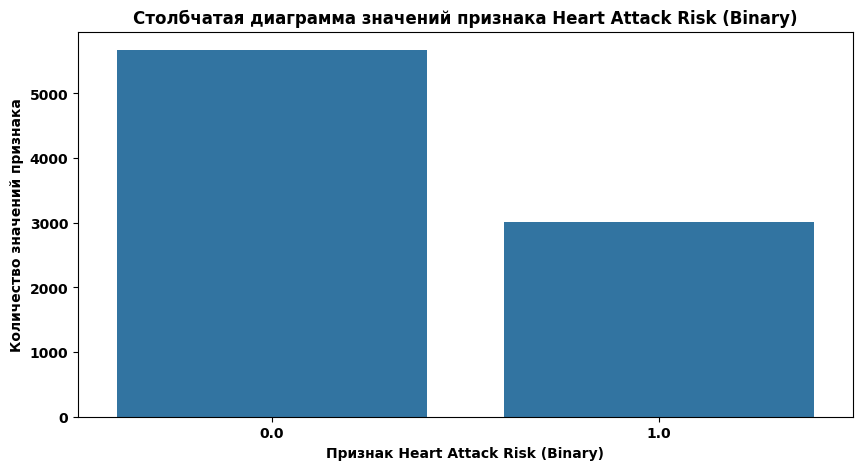

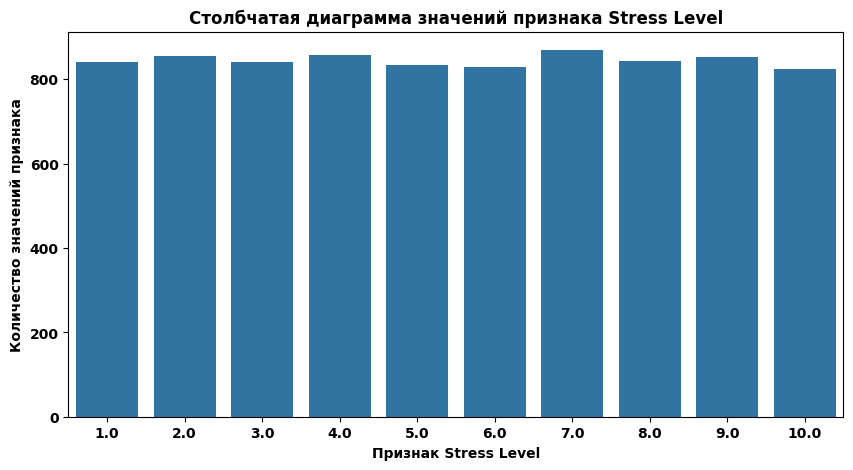

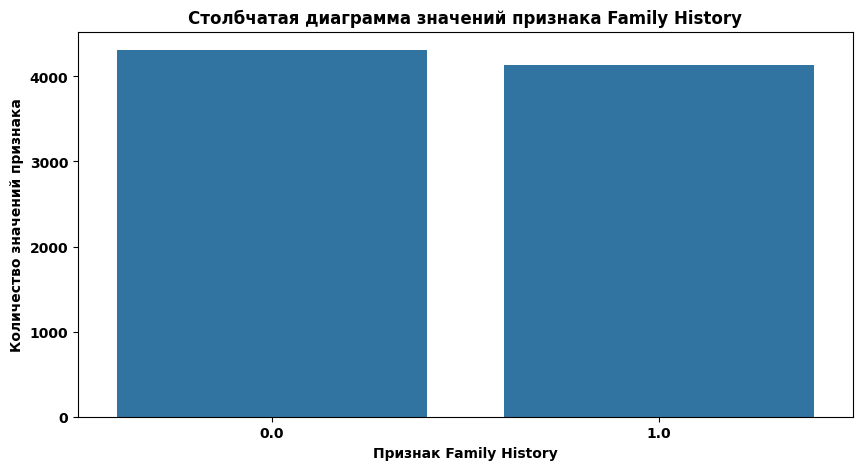

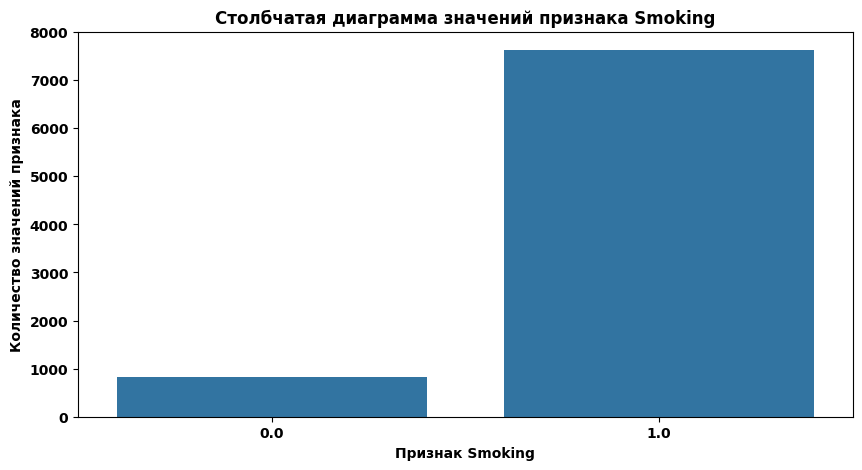

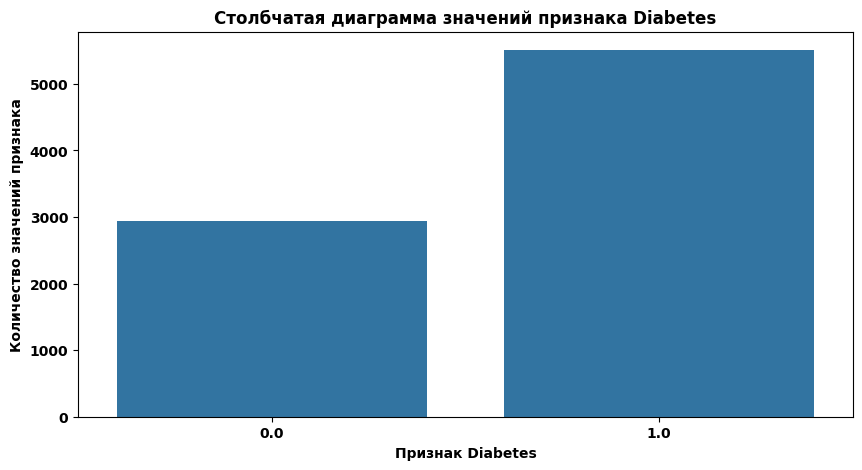

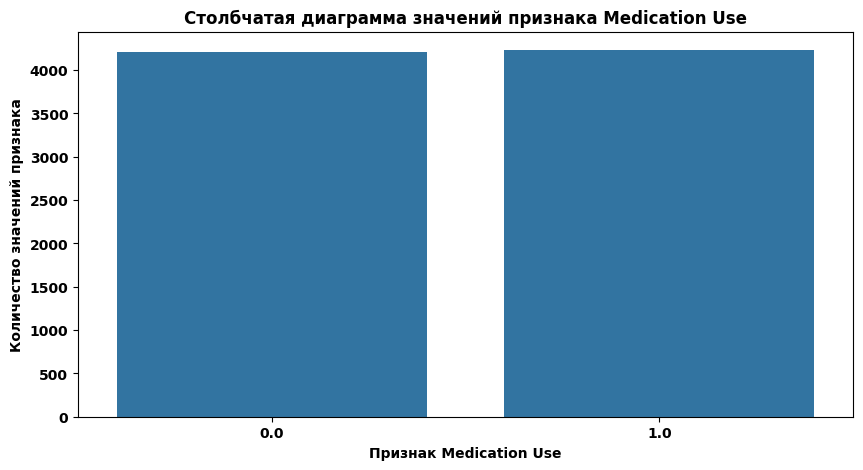

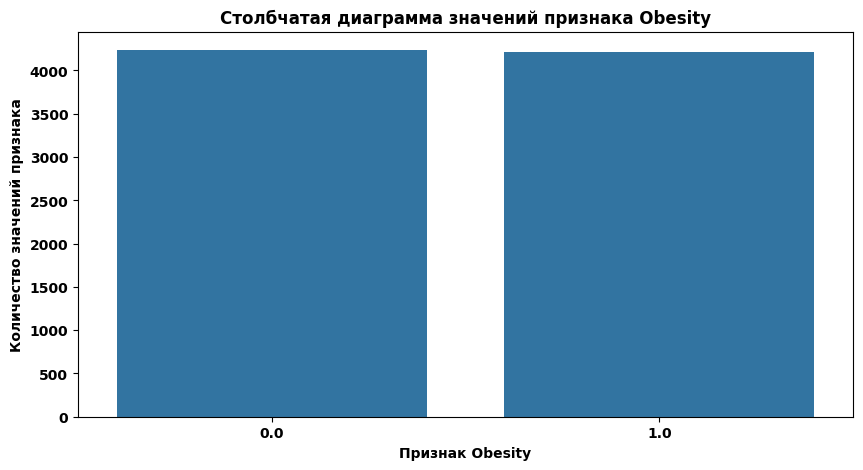

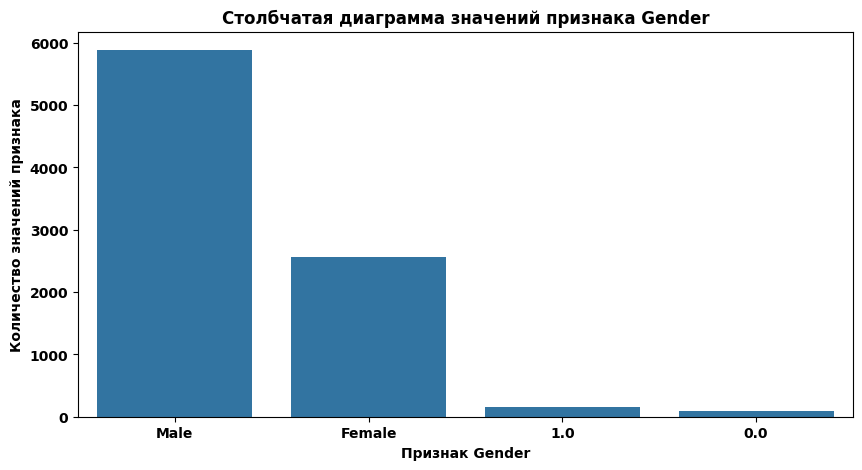

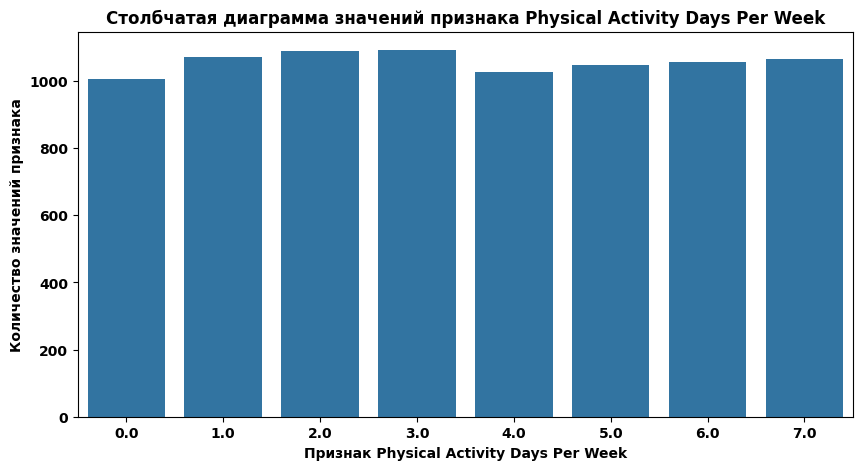

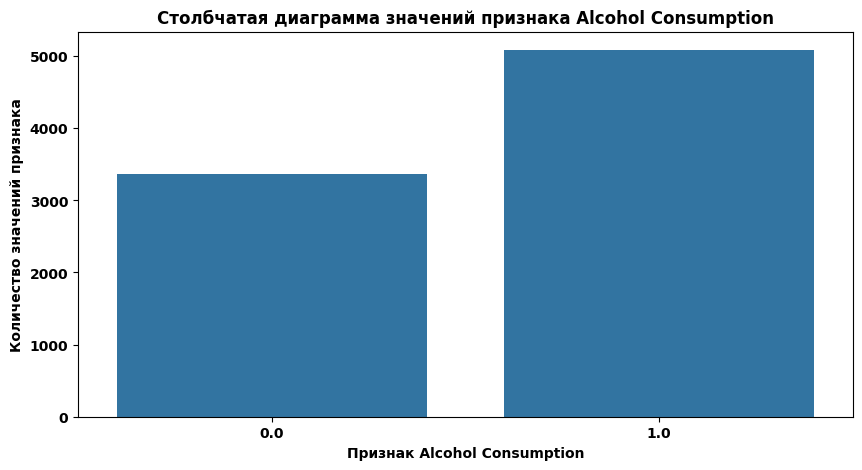

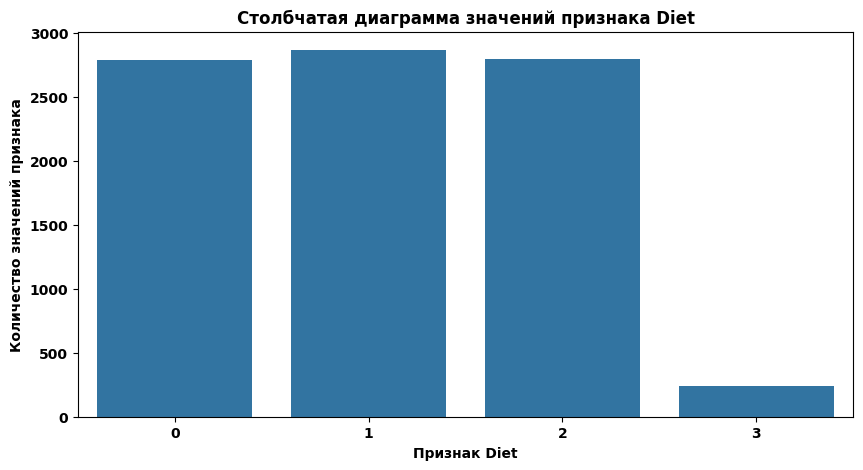

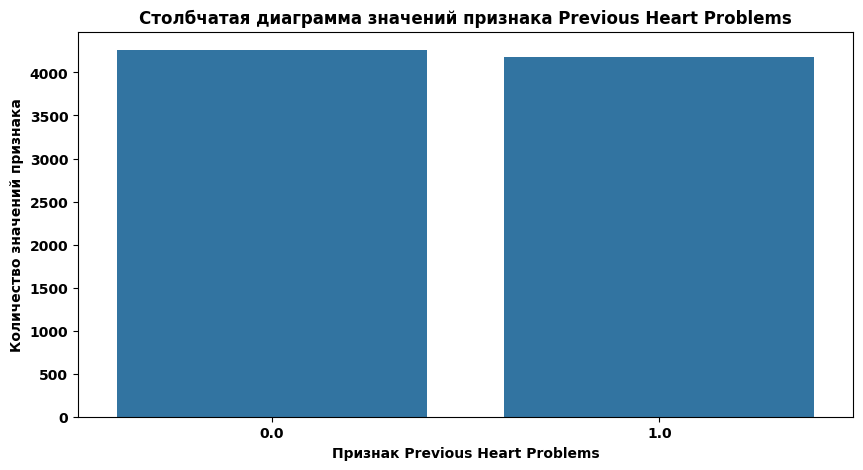

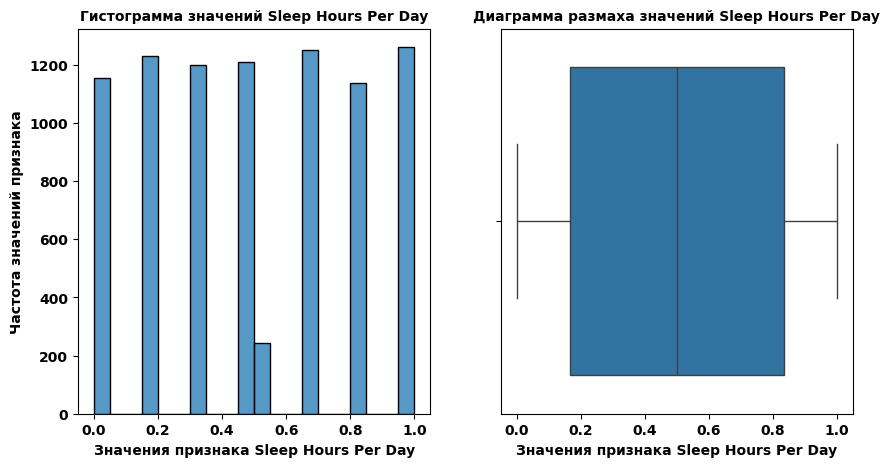

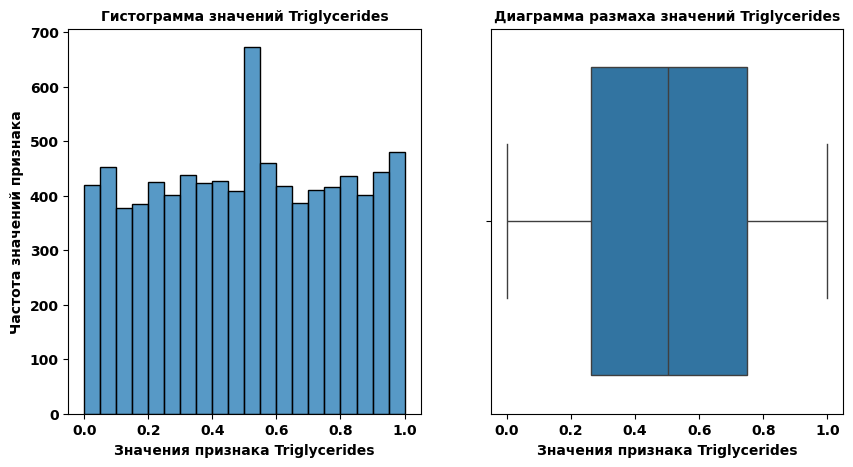

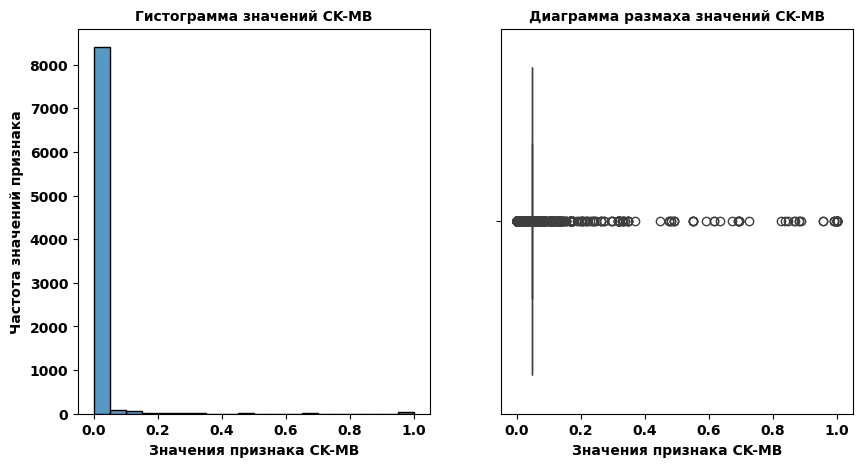

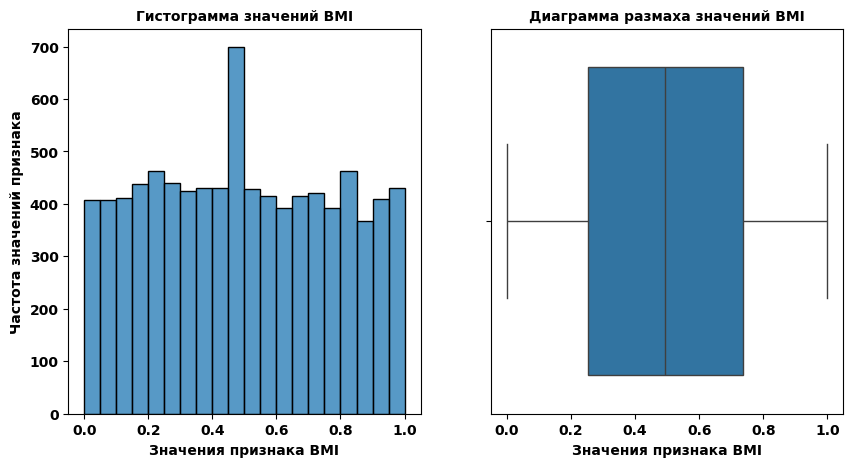

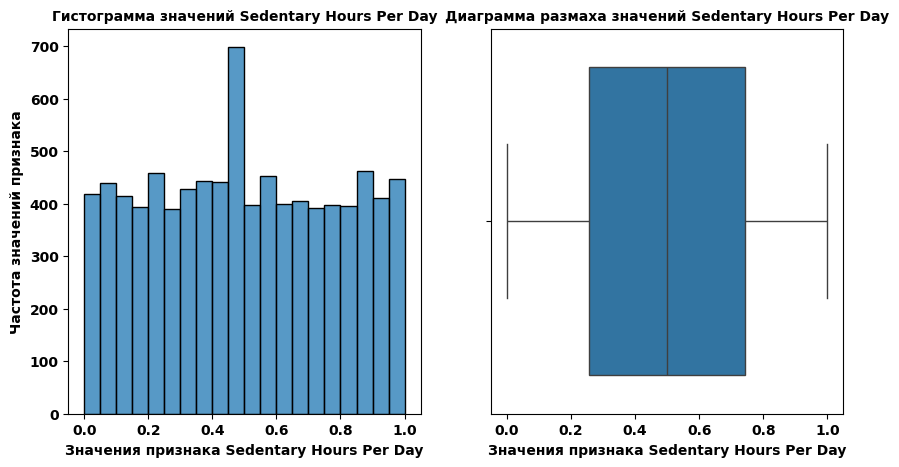

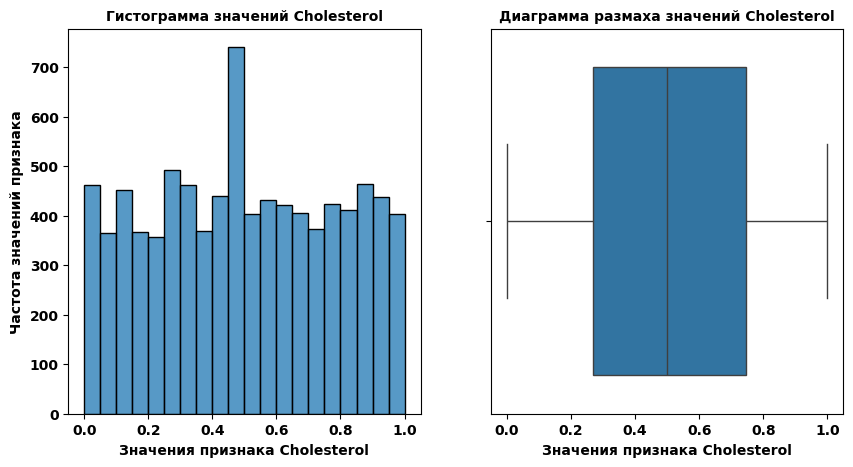

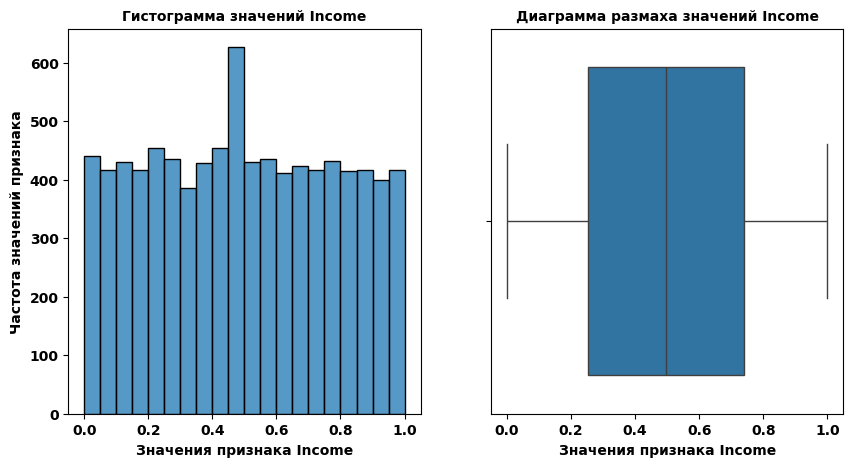

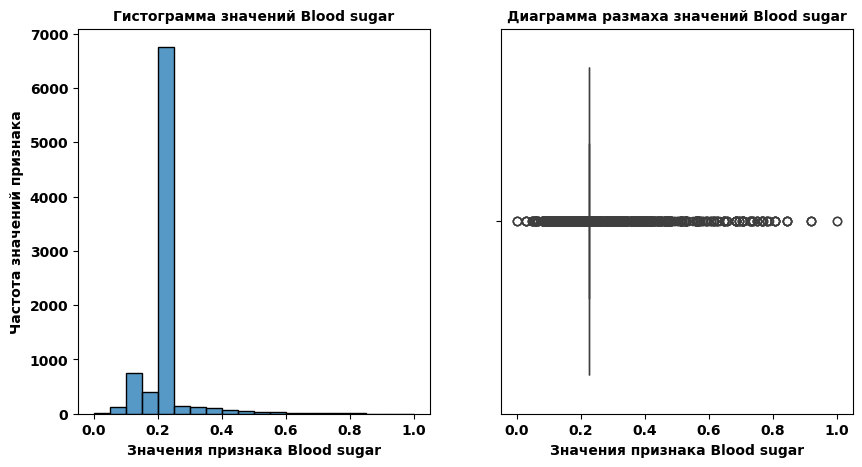

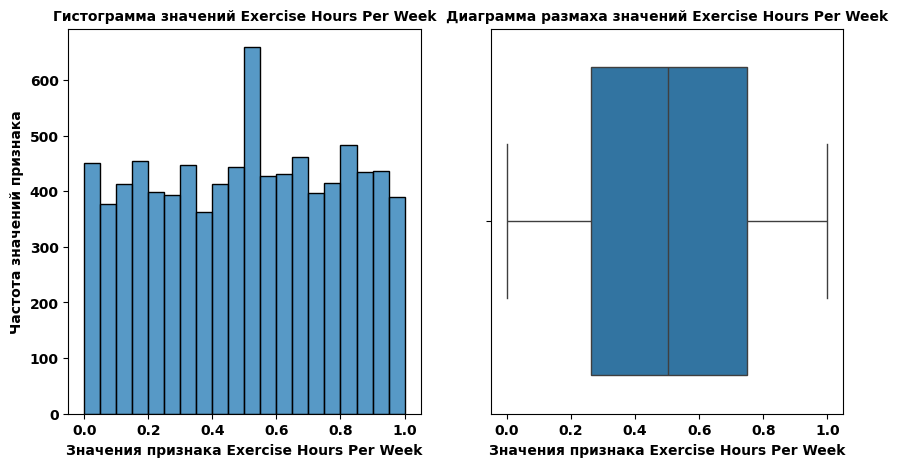

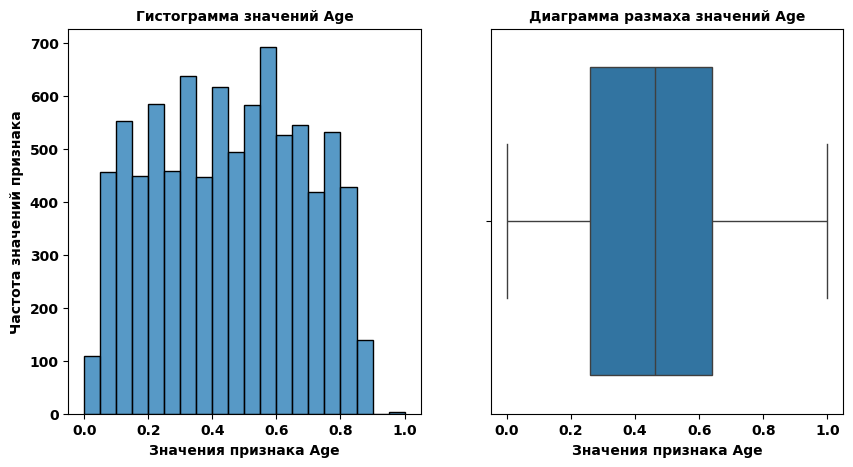

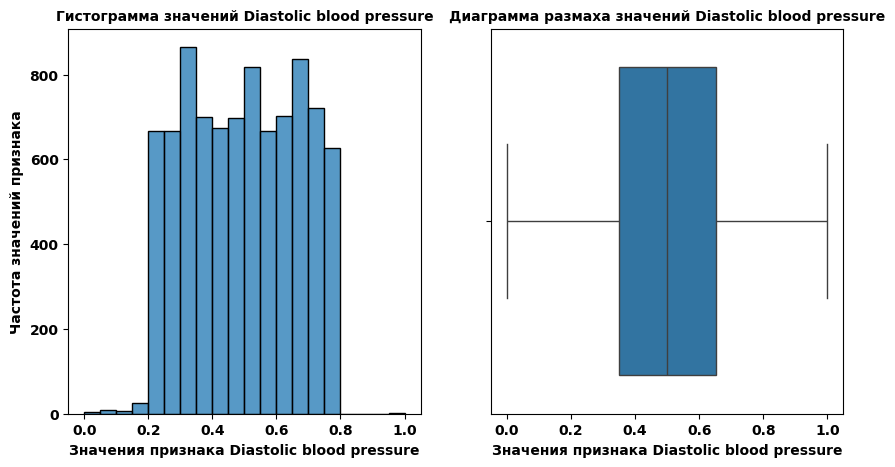

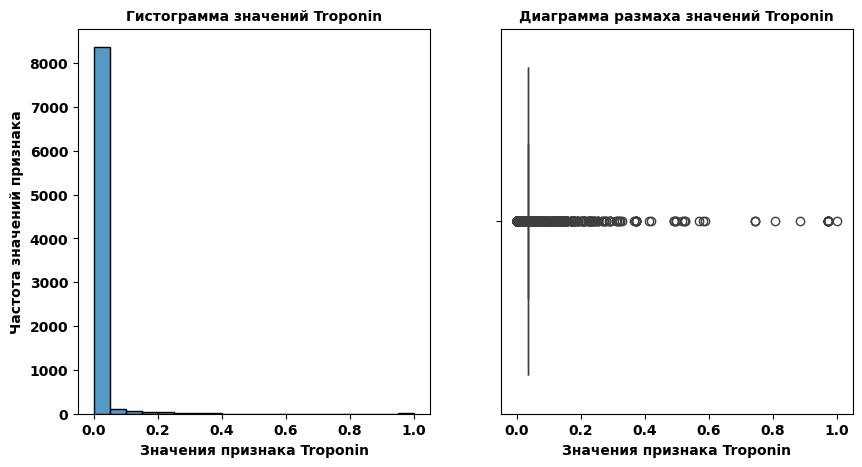

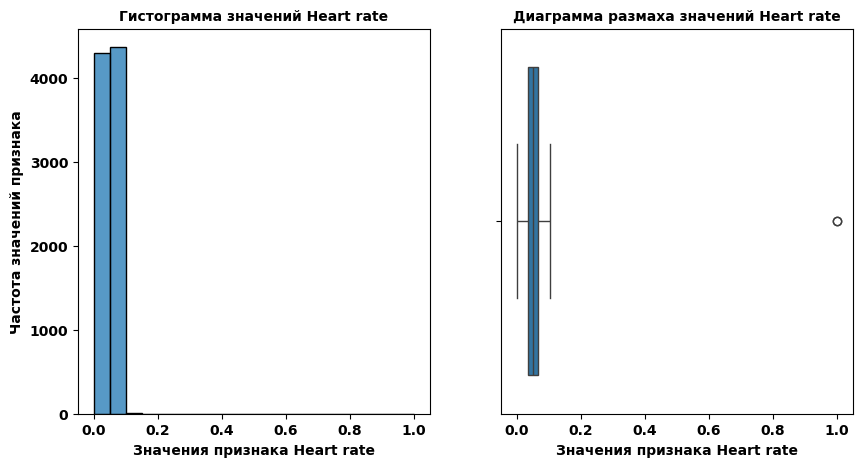

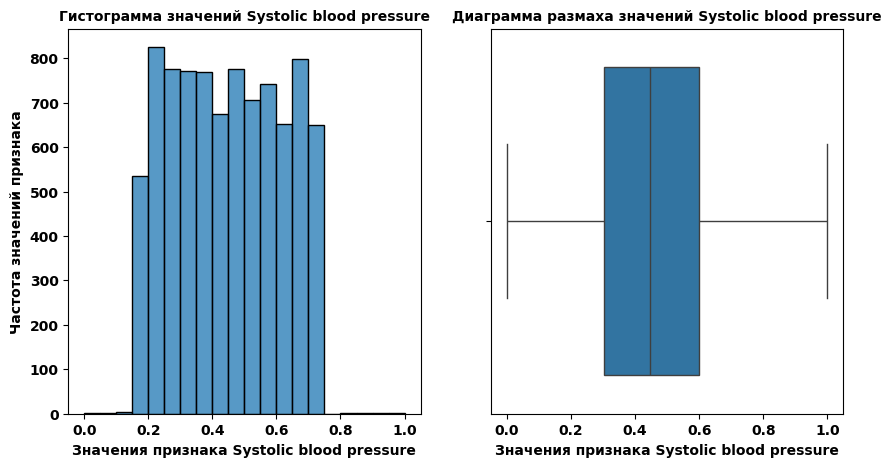

In [7]:
# вывод на экран параметров датасета 'train_data'
first_meeting(train_data, 'train_data')

# формирование множества дискретных количественных показателей
num_discrete = {'Diabetes', 'Family History', 'Smoking', 'Obesity', 'Medication Use', 'Alcohol Consumption',
            'Diet', 'Previous Heart Problems', 'Medication Use', 'Stress Level', 'Physical Activity Days Per Week', 'Heart Attack Risk (Binary)', 'Gender'}

# вывод на экран графиков дискретных количественных величин по набору 'train_data'
for col in num_discrete:
    num_countplot(train_data, col)

# вывод на экран графиков непрерывных количественных величин по набору 'train_data'
for col in set(train_data.drop(['Unnamed: 0', 'id'], axis = 1).columns).difference(num_discrete):
    num_distribution(train_data, col, 20)

In [8]:
# проверка соответствия названий столбцов в 'train_data' и 'test_features'
print('Отсутствующие столбцы в test_features по сравнению с train_data:', set(train_data.columns.str.upper()).difference(test_features.columns.str.upper()))

Отсутствующие столбцы в test_features по сравнению с train_data: {'HEART ATTACK RISK (BINARY)'}


Структура набора данных test_features


,Unnamed: 0,Age,Cholesterol,Heart rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,Diet,Previous Heart Problems,Medication Use,Stress Level,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Blood sugar,CK-MB,Troponin,Gender,Systolic blood pressure,Diastolic blood pressure,id
0,0,0.49,0.26,0.06,0.00,1.00,1.00,1.00,1.00,0.36,2,0.00,0.00,8.00,0.19,0.59,0.28,0.31,1.00,0.33,0.23,0.05,0.04,Male,0.28,0.37,7746
1,1,0.22,0.95,0.08,1.00,0.00,0.00,1.00,0.00,1.00,2,1.00,1.00,5.00,0.33,0.60,0.47,0.09,0.00,0.17,0.23,0.05,0.04,Female,0.70,0.44,4202
2,2,0.63,0.09,0.06,0.00,1.00,1.00,1.00,0.00,1.00,0,0.00,0.00,10.00,0.78,0.37,0.41,0.21,7.00,1.00,0.10,0.00,0.09,Male,0.46,0.78,6632
3,3,0.46,0.57,0.06,1.00,1.00,1.00,1.00,1.00,0.44,0,0.00,0.00,10.00,0.79,0.37,0.91,0.16,0.00,0.67,0.20,0.06,0.27,Female,0.74,0.26,4639
4,4,0.72,0.49,0.02,1.00,0.00,1.00,0.00,1.00,0.51,0,0.00,0.00,7.00,0.07,0.73,0.76,0.58,5.00,0.00,0.23,0.05,0.04,Male,0.41,0.40,4825


Общая информация о наборе
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 966 entries, 0 to 965
Data columns (total 27 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Unnamed: 0                       966 non-null    int64  
 1   Age                              966 non-null    float64
 2   Cholesterol                      966 non-null    float64
 3   Heart rate                       966 non-null    float64
 4   Diabetes                         935 non-null    float64
 5   Family History                   935 non-null    float64
 6   Smoking                          935 non-null    float64
 7   Obesity                          935 non-null    float64
 8   Alcohol Consumption              935 non-null    float64
 9   Exercise Hours Per Week          966 non-null    float64
 10  Diet                             966 non-null    int64  
 11  Previous Heart Problems          935 non-null    float64
 

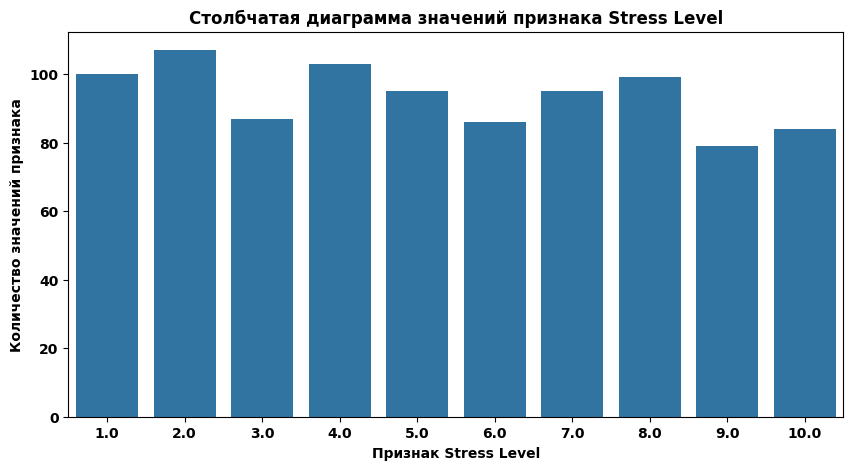

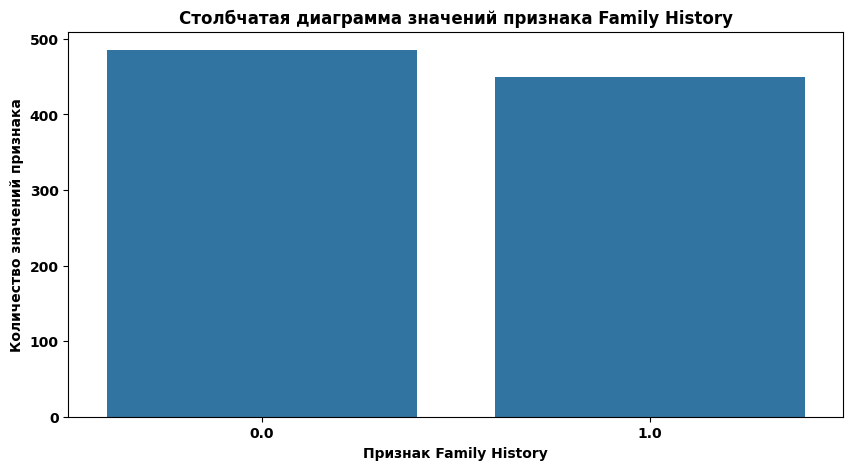

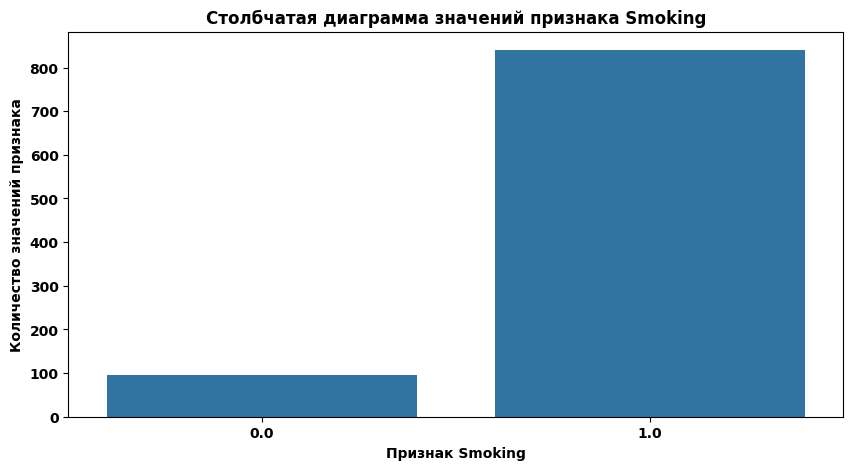

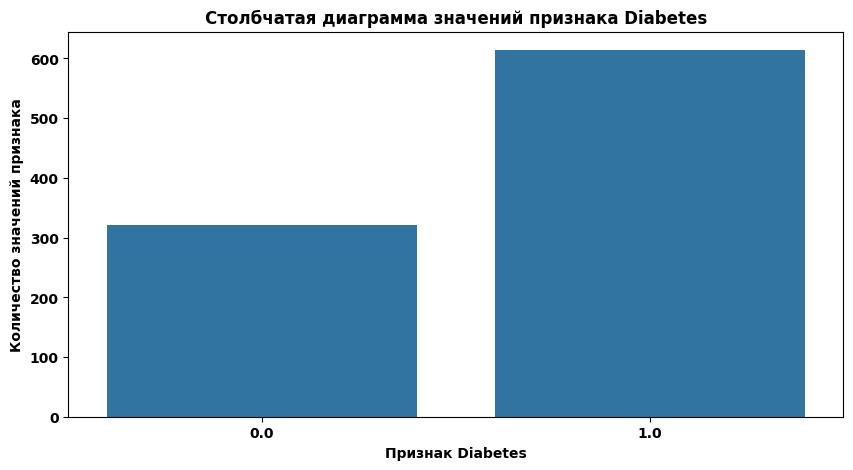

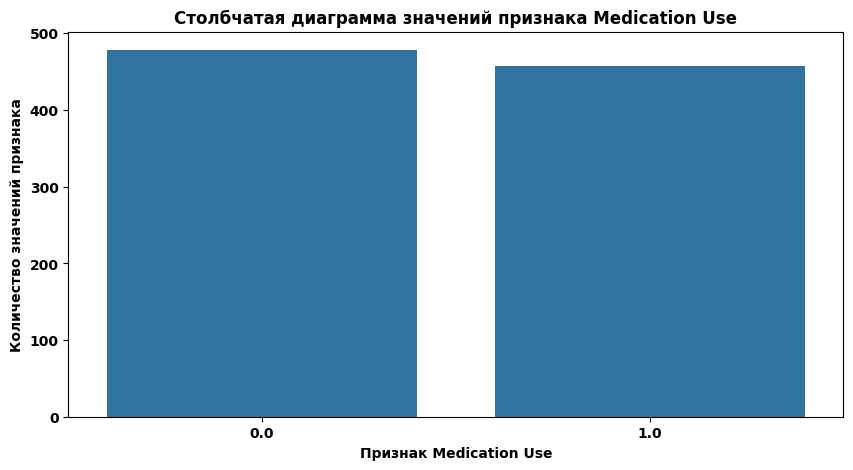

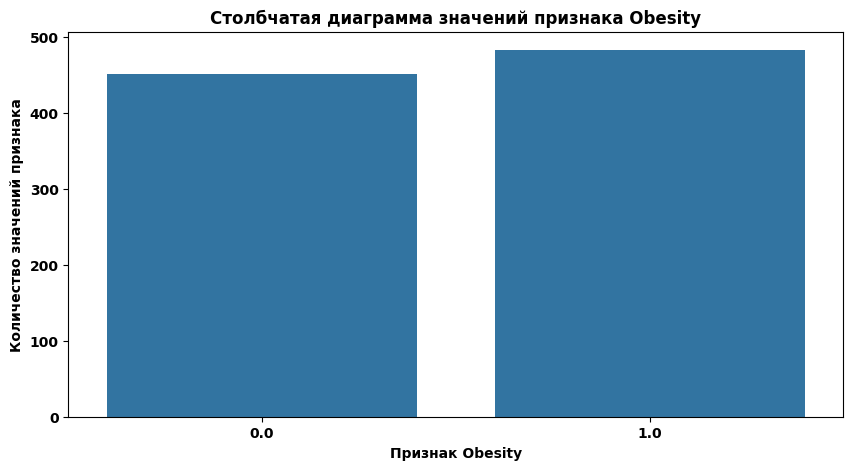

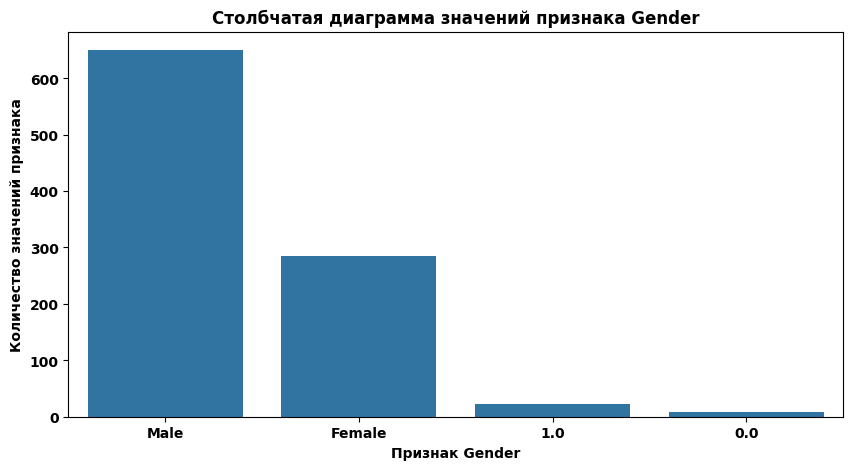

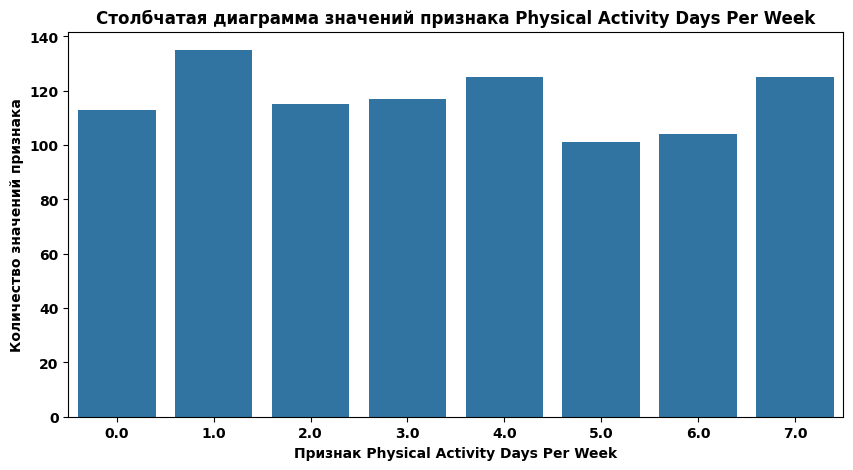

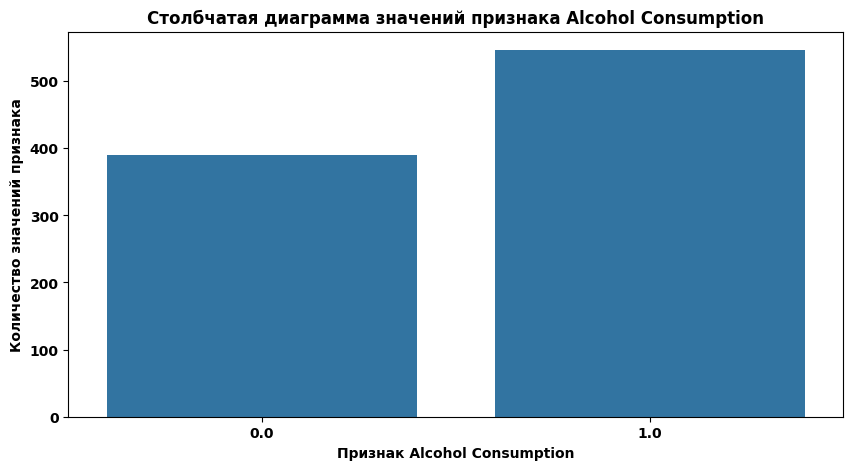

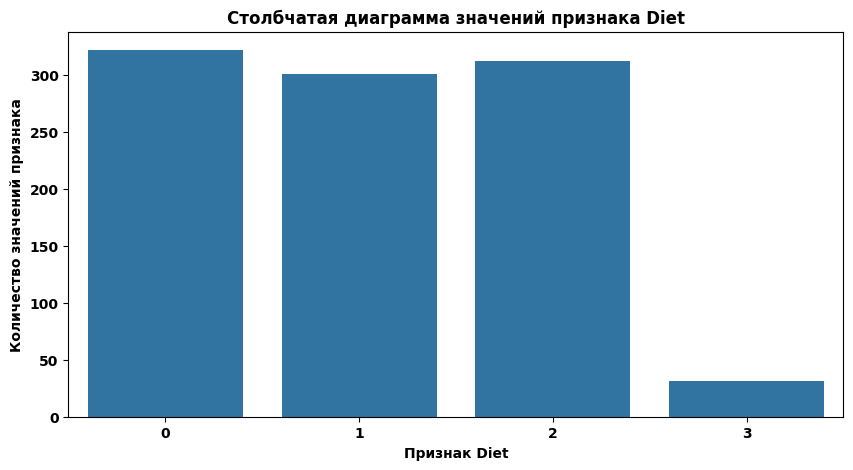

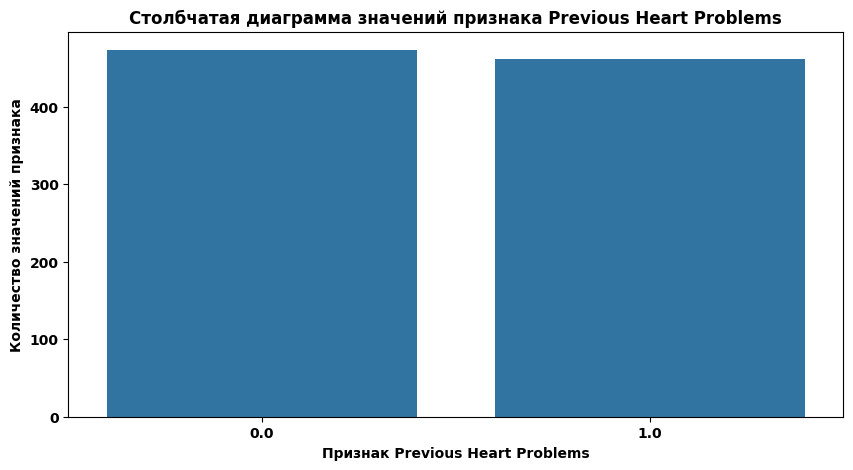

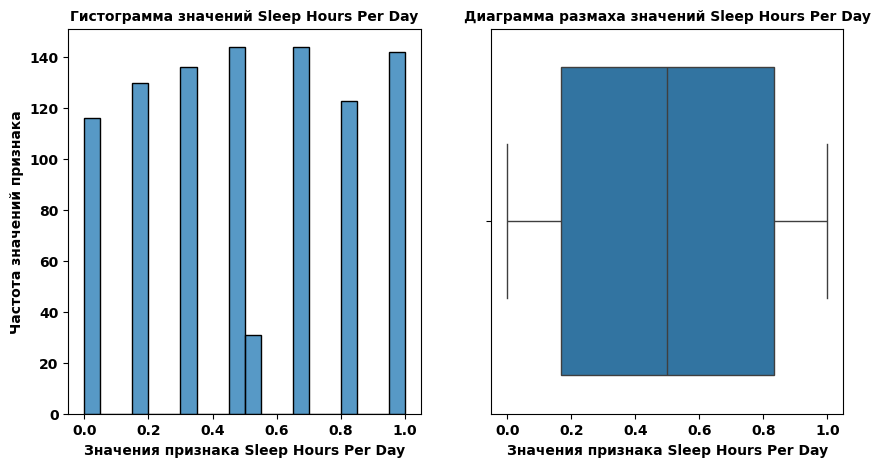

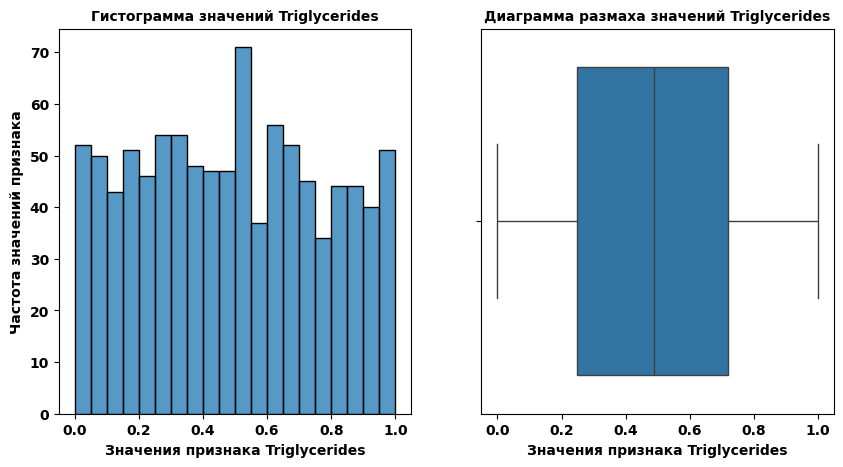

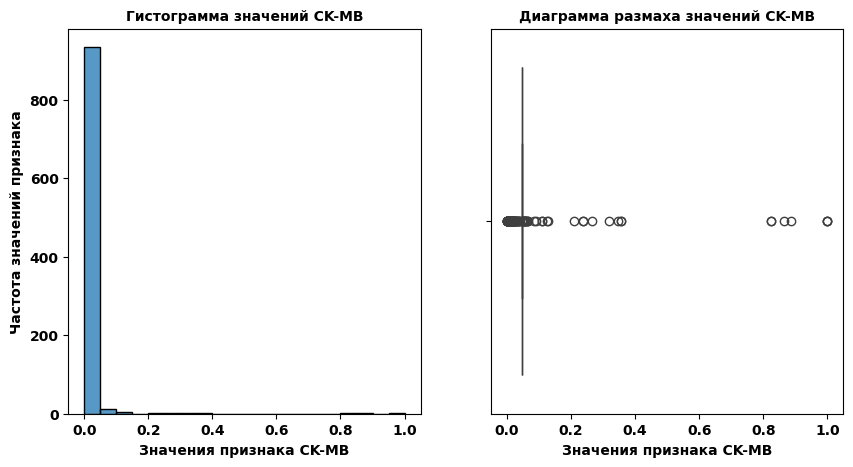

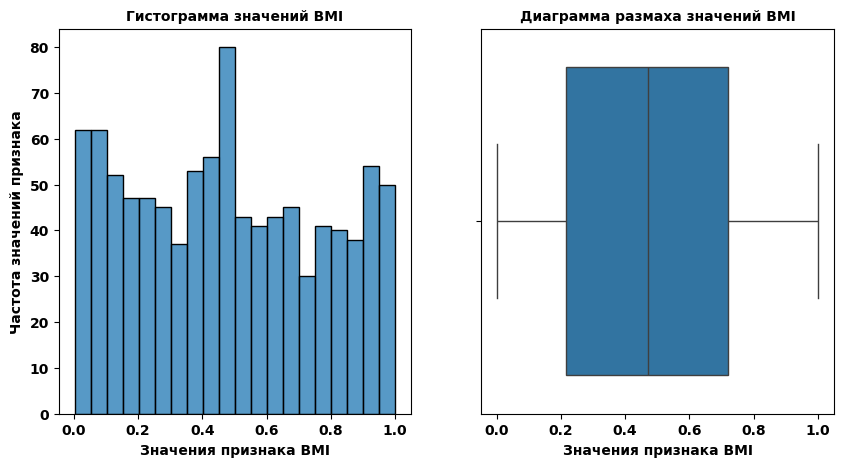

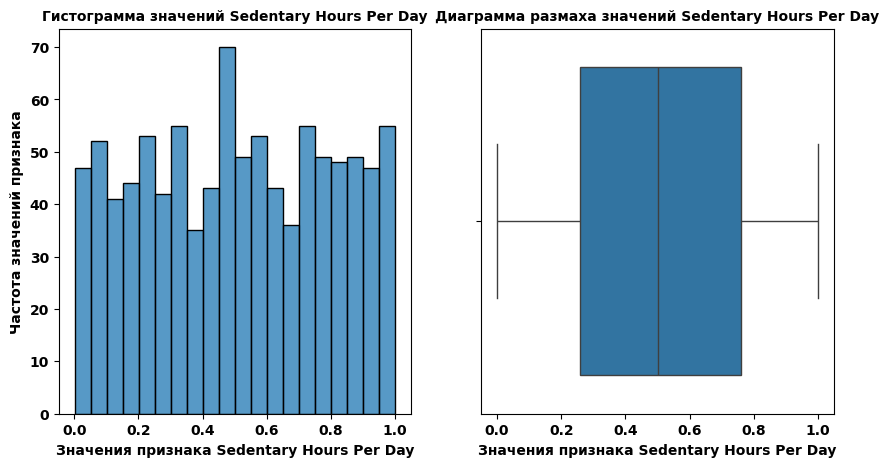

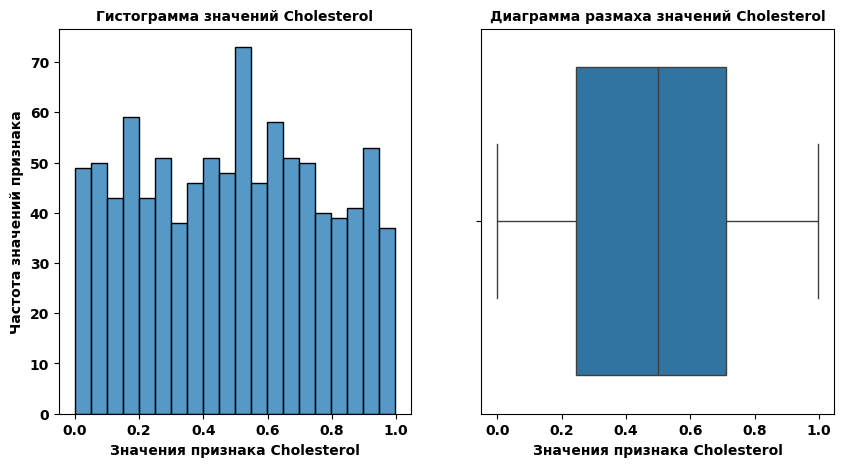

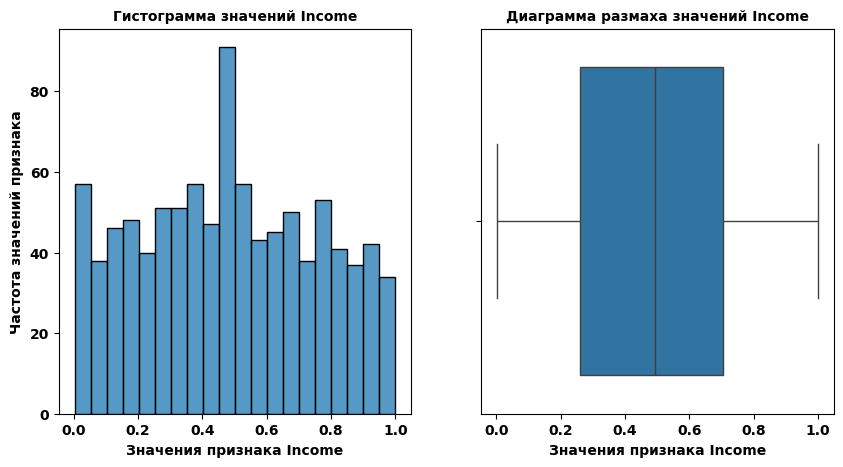

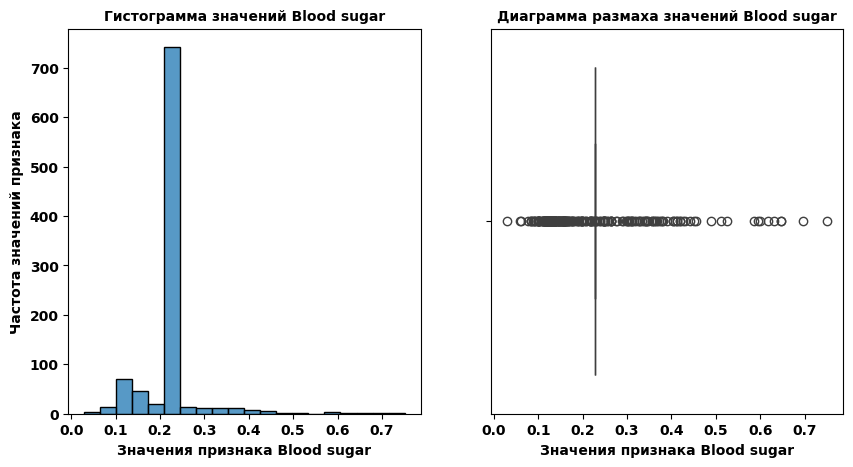

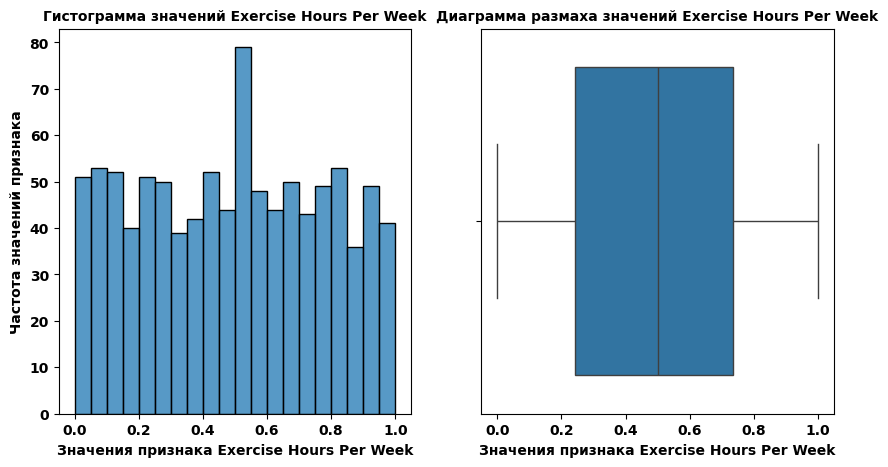

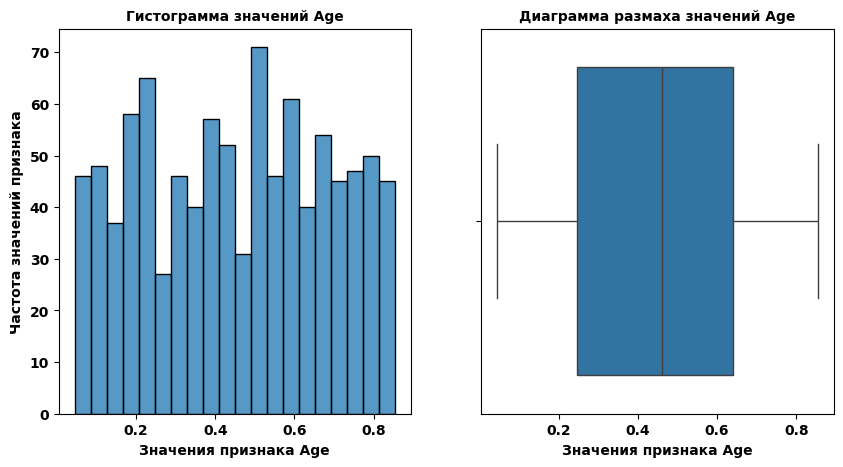

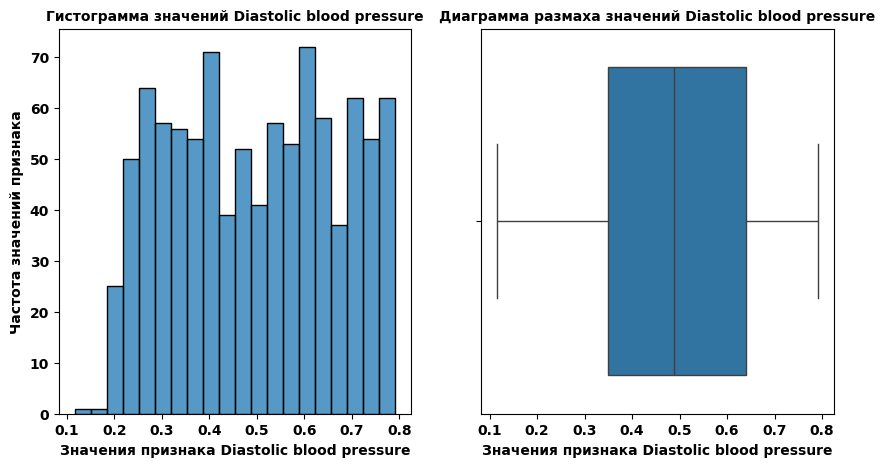

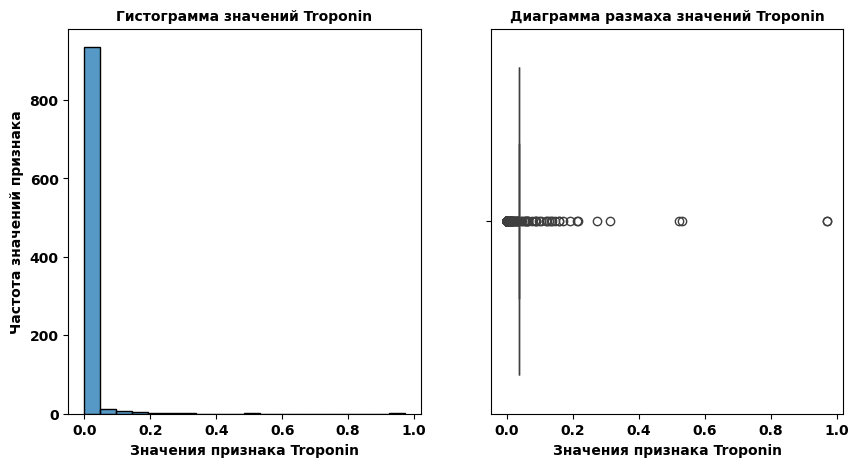

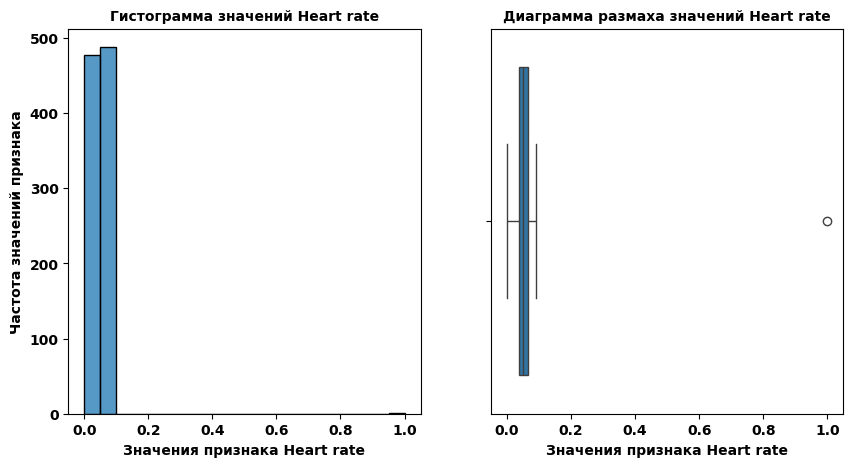

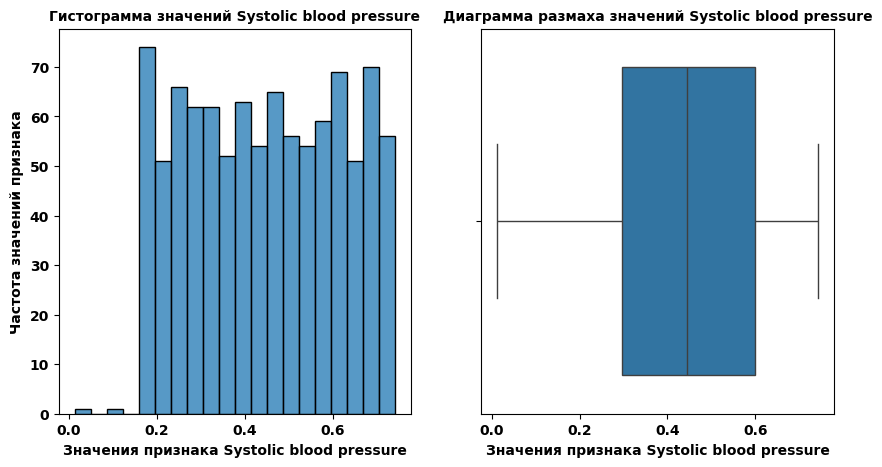

In [9]:
# удаление из переменной 'num_descrete' таргета
num_discrete.discard('Heart Attack Risk (Binary)')

# вывод на экран параметров датасета 'test_features'
first_meeting(test_features, 'test_features')

# вывод на экран графиков дискретных количественных величин по набору 'test_features'
for col in num_discrete:
    num_countplot(test_features, col)

# вывод на экран графиков непрерывных количественных величин по набору 'test_features'
for col in set(test_features.drop(['Unnamed: 0', 'id'], axis = 1).columns).difference(num_discrete):
    num_distribution(test_features, col, 20)

**Вывод**

1. Произведена загрузка данных в рабочую среду Jupyter Notebook. Инициализированы переменные в соответствие с названиями загружаемых датасетов:
    * `train_data`;
    * `test_features`.
2. Выведены на экран параметры датасетов:
    * `train_data`
        * В наборе данных **имеются пустые значения** по признакам:
            * **Diabetes**;
            * **Family History**;
            * **Smoking**;
            * **Obesity**;
            * **Alcohol Consumption**;
            * **Previous Heart Problems**;
            * **Medication Use**;
            * **Stress level**;
            * **Physical Activity Days Per Week**.
        * Признаки нуждаются в предобработке. Типы данных не соответствуют содержанию:
            * **Дискретные признаки необходимо привести к целочисленному типу**;
            * Бинарные признаки необходимо привести к единому типу - целочисленному (например, **Gender**)
        * Названия столбцов **не соответствуют формату snake_case**;
        * Наблюдаются выбросы по признакам:
            * **Heart rate**;
            * **Troponin**;
            * **Blood sugar**;
            * **CK-MB**
            
            Необходимо изучить данные случаи на этапе исследовательского анализа;
    
    * `test_features`
        * В наборе данных **имеются пустые значения** по признакам:
            * **Diabetes**;
            * **Family History**;
            * **Smoking**;
            * **Obesity**;
            * **Alcohol Consumption**;
            * **Previous Heart Problems**;
            * **Medication Use**;
            * **Stress level**;
            * **Physical Activity Days Per Week**.
        * Признаки нуждаются в предобработке. Типы данных не соответствуют содержанию:
            * **Дискретные признаки необходимо привести к целочисленному типу**;
            * Бинарные признаки необходимо привести к единому типу - целочисленному (например, **Gender**)
        * Названия столбцов **не соответствуют формату snake_case**;
        * Наблюдаются выбросы по признакам:
            * **Heart rate**;
            * **Troponin**;
            * **Blood sugar**;
            * **CK-MB**
            
            Необходимо изучить данные случаи на этапе исследовательского анализа.

## Предобработка данных <a class = 'anchor' id = 'Предобработка'></a>

Данный блок характеризуется следующими последовательными действиями:

1. Приведение заголовков наборов данных к стилю написания 'snake_case';
2. Явное приведение данных к соответствующим типам;
3. Обработка пустых значений наборов данных;
4. Проверка датасетов на дубликаты:
    * Явные дубликаты;
    * Неявные дубликаты.
5. Формирование вывода по итогам данного этапа.

In [10]:
# инициализация пользовательской функции преобразования признаков к целочисленному типу
def float_to_int(df : pd.DataFrame, cols_list : list) -> pd.DataFrame:
    for col in cols_list:
        df[col] = df[col].astype('Int64')
    return df

In [11]:
# замена значений в столбце 'gender' на числовые
train_data['Gender'] = train_data['Gender'].map({'Male' : 1, 'Female' : 0})
test_features['Gender'] = test_features['Gender'].map({'Male' : 1, 'Female' : 0})


# преобразование столбцов к целочисленному типу
train_data = float_to_int(train_data, num_discrete)
test_features = float_to_int(test_features, num_discrete)

display(train_data[list(num_discrete)].info())
print()
display(test_features[list(num_discrete)].info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8685 entries, 0 to 8684
Data columns (total 11 columns):
 #   Column                           Non-Null Count  Dtype
---  ------                           --------------  -----
 0   Stress Level                     8442 non-null   Int64
 1   Family History                   8442 non-null   Int64
 2   Smoking                          8442 non-null   Int64
 3   Diabetes                         8442 non-null   Int64
 4   Medication Use                   8442 non-null   Int64
 5   Obesity                          8442 non-null   Int64
 6   Gender                           8442 non-null   Int64
 7   Physical Activity Days Per Week  8442 non-null   Int64
 8   Alcohol Consumption              8442 non-null   Int64
 9   Diet                             8685 non-null   Int64
 10  Previous Heart Problems          8442 non-null   Int64
dtypes: Int64(11)
memory usage: 839.8 KB


None


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 966 entries, 0 to 965
Data columns (total 11 columns):
 #   Column                           Non-Null Count  Dtype
---  ------                           --------------  -----
 0   Stress Level                     935 non-null    Int64
 1   Family History                   935 non-null    Int64
 2   Smoking                          935 non-null    Int64
 3   Diabetes                         935 non-null    Int64
 4   Medication Use                   935 non-null    Int64
 5   Obesity                          935 non-null    Int64
 6   Gender                           935 non-null    Int64
 7   Physical Activity Days Per Week  935 non-null    Int64
 8   Alcohol Consumption              935 non-null    Int64
 9   Diet                             966 non-null    Int64
 10  Previous Heart Problems          935 non-null    Int64
dtypes: Int64(11)
memory usage: 93.5 KB


None

In [12]:
# инициализация пользовательской функции преобразования названий столбцов к формату 'snake_case'
def snake_case_transformation(df : pd.DataFrame) -> pd.DataFrame:
    new_columns = []
    for column in df.columns:
        new_columns.append(column.lower().replace(' ', '_'))
    df.columns = new_columns
    return df

# приведение названий столбцов к формату 'snake_case'
train_data = snake_case_transformation(train_data)
test_features = snake_case_transformation(test_features)

# удаление неинформативных столбцов из наборов данных
train_data = train_data.drop('unnamed:_0', axis = 1)
test_features = test_features.drop('unnamed:_0', axis = 1)

# вывод на экран измененных названий столбцов
print('Названия столбцов train_data после преобразования:')
print(train_data.columns)
print()
print('Названия столбцов test_features после преобразования:')
print(test_features.columns)

Названия столбцов train_data после преобразования:
Index(['age', 'cholesterol', 'heart_rate', 'diabetes', 'family_history',
       'smoking', 'obesity', 'alcohol_consumption', 'exercise_hours_per_week',
       'diet', 'previous_heart_problems', 'medication_use', 'stress_level',
       'sedentary_hours_per_day', 'income', 'bmi', 'triglycerides',
       'physical_activity_days_per_week', 'sleep_hours_per_day',
       'heart_attack_risk_(binary)', 'blood_sugar', 'ck-mb', 'troponin',
       'gender', 'systolic_blood_pressure', 'diastolic_blood_pressure', 'id'],
      dtype='object')

Названия столбцов test_features после преобразования:
Index(['age', 'cholesterol', 'heart_rate', 'diabetes', 'family_history',
       'smoking', 'obesity', 'alcohol_consumption', 'exercise_hours_per_week',
       'diet', 'previous_heart_problems', 'medication_use', 'stress_level',
       'sedentary_hours_per_day', 'income', 'bmi', 'triglycerides',
       'physical_activity_days_per_week', 'sleep_hours_per_day'

In [13]:
# инициализация пользовательской функции построения сводной таблицы пустых значений в наборах данных
def isna_pivot(df : pd.DataFrame):
    df_pivot = df.isna().sum().to_frame().rename(columns = {0 : 'missing_values'})
    df_pivot = df_pivot[df_pivot['missing_values'] > 0]
    df_pivot['%_share'] = (df_pivot['missing_values'] / df.shape[0] * 100).round(2)
    return df_pivot

# запись фреймов в отдельные переменные
train_data_missValues = isna_pivot(train_data)
test_features_missValues = isna_pivot(test_features)

# вывод на экран сводной таблицы пустых значений train_data
print('Сводная таблица пустых значений в train_data')
display(train_data_missValues.sort_values(by = 'missing_values', ascending = False))
print()
# вывод на экран сводной таблицы пустых значений test_features
print('Сводная таблица пустых значений в test_features')
display(test_features_missValues.sort_values(by = 'missing_values', ascending = False))

Сводная таблица пустых значений в train_data


,missing_values,%
diabetes,243,2.80
family_history,243,2.80
...,...,...
physical_activity_days_per_week,243,2.80
gender,243,2.80



Сводная таблица пустых значений в test_features


,missing_values,%


**Вывод по промежуточному этапу**

Пропущенные значения представлены в **дискретных категориальных признаках**. При этом, **большая часть признаков - бинарные**.

Пропуски в бинарных признаках возможно по той причине, что человек решил явно не указывать информацию о себе: если пациент не употребяет алкоголь (к примеру), нет смысла явно обозначать потребление "0", а можно пропустить вопрос в анкете. Подобные случаи можно заменить на "0".

Пропущенные значения в признаке **physical_activity_days_per_week** (количество дней физической активности в неделю) можно заменить на "0". Человек явно не стал указывать, что он не занимается физнагрузками в неделю.

Пропущенные значения в признаке **gender** (пол) можно заменить на "0" - пациент женского пола.

Пропущенные значения в признаке **stress_level** не получится заменить на "0". Предлагается заменить пропущенные значения на медианное по датасету.

In [14]:
# инициализация пользовательской функции по замене пропущенных значений в признаках датасетов
def fill_miss_values(df : pd.DataFrame, cols_list : list, fill_value) -> pd.DataFrame:
    for col in cols_list:
        df[col] = df[col].fillna(fill_value)
    return  df

In [15]:
# список столбцов с пропущенными значениями с исключением признака 'stress_level'
missValue_cols = test_features_missValues.index.to_list()
missValue_cols.remove('stress_level')

# замена пропущенных значений в наборах данных
train_data = fill_miss_values(train_data, missValue_cols, 0)
test_features = fill_miss_values(test_features, missValue_cols, 0)

# замена пропущенных значений в признаке 'stress_level'
train_data['stress_level'] = train_data['stress_level'].fillna(train_data['stress_level'].median())
test_features['stress_level'] = test_features['stress_level'].fillna(test_features['stress_level'].median())

In [20]:
# проверка датасетов на явные дубликаты
print('Количество явных дубликатов в train_data:', train_data.duplicated().sum())
print('Количество явных дубликатов в test_features:', test_features.duplicated().sum())
print()
# дополнительная проверка на дубликаты по столбцу 'id'
print('Количество явных дубликатов в train_data при проверке признака id:', train_data['id'].duplicated().sum())
print('Количество явных дубликатов в test_features при проверке признака id:', test_features['id'].duplicated().sum())

Количество явных дубликатов в train_data: 0
Количество явных дубликатов в test_features: 0

Количество явных дубликатов в train_data при проверке признака id: 0
Количество явных дубликатов в test_features при проверке признака id: 0


**Вывод по промежуточному этапу**

**В датасетах отсутствуют явные дубликаты** - проверка строк целиком и признака **id** подтвердила это, все пациенты уникальны.

**Неявных дубликатов в датасетах нет** - характер и типы данных не предполагает их наличия.

**Вывод**

1. Заголовки наборов данных **приведены к стилю написания 'snake_case'**;
2. Проведено преобразование типов данных. Дискретные количественнные признаки преобразованы к целочисленному типу;
3. Проведена обработка пропущенных значений в столбцах наборов данных. Большая часть пропусков была заменена на "0" по причине того, что пациент решил явно не указывать о себе информацию в анкете. Пропущенные значения по признаку **stress_rate** были заменены на медианное значение по датасету;
4. Выполнена проверка наборов данных на дубликаты:
    * **Явные дубликаты** - явные дубликаты **не обнаружены**; 
    * **Неявные дубликаты** - неявные дубликаты **не обнаружены**. 
5. Данные прошли этап предобработки и готовы к исследовательскому анализу.

## Исследовательский анализ данных <a class = 'anchor' id = 'Исследование'></a>

Данный блок характеризуется следующими последовательными действиями:

1. Исследование соотношения количества значений категориальных показателей;
2. Исследование распределения количественных показателей наборов. Построение **гистограмм распределения значений**;
3. Формирование вывода по итогам этапа.

### Исследование категориальных признаков <a class = 'anchor' id = 'Исследование_категория'></a>

In [ ]:
# инициализация пользовательской функции по формированию вывода информации

def display_info(df: pd.DataFrame, column_name: str, title: str, xlabel: str, kind_of_plot : str):
# построение визуализации по выбранной метрике
    plt.title(title, fontsize = 12)
    if kind_of_plot == 'pie':
        (df[column_name]
         .value_counts()
         .sort_values(ascending=True)
         .plot(kind = kind_of_plot, figsize = (8, 5), autopct='%1.0f%%'))
    else:
        (df[column_name]
         .value_counts()
         .sort_values(ascending=True)
         .plot(kind = kind_of_plot, figsize = (8, 5)))
    ax = plt.gca()
    ax.axes.yaxis.set_visible(False)
    plt.xlabel(xlabel)
    plt.show()

# построение сводной таблицы по выбранной метрике
    pivot_data = (df[column_name]
                  .value_counts()
                  .sort_values(ascending=False)
                  .to_frame())
    pivot_data['share_of_patients'] = round(pivot_data['count'] / pivot_data['count'].sum() * 100, 2)
    pivot_data.columns = ['count_of_patients', 'share_of_patients']
    display(pivot_data)

In [22]:
# инициализация пользовательской функции по построению гистограмм по передаваемым метрикам
def histogram_plotting(data: pd.DataFrame, feature : str, bins: int, x_size: int, y_size: int, feature_xlabel : str):
    # вычисление статистических метрик для дальнейшей визуализации
    q1 = data[feature].quantile(0.25)
    q3 = data[feature].quantile(0.75)
    upper_bound = q3 + 1.5 * (q3 - q1)
    lower_bound = q1 - 1.5 * (q3 - q1)

    # построение визуализации
    plt.figure(figsize = (x_size, y_size))
    plt.hist(data[feature], color = 'blue', edgecolor = 'white', bins = bins)
    plt.axvline(upper_bound, c = 'red', ls = '-', label = 'верхняя граница допустимых значений')
    plt.axvline(q3, c = 'red', ls = '--', label = '3 квартиль значений')
    plt.axvline(q1, c = 'black', ls = '--', label = '1 квартиль значений')
    plt.axvline(lower_bound, c = 'black', ls = '-', label = 'нижняя граница допустимых значений')
    plt.title(f'Гистограмма распределения значений по метрике: {feature_xlabel}', fontsize = 10)
    plt.xlabel(feature_xlabel)
    plt.ylabel('Количество значений по метрике')
    plt.legend(bbox_to_anchor = (1, 0.6))
    plt.show()

    # вывод статистических метрик на экран
    print('Верхняя допустимая граница значений:', upper_bound)
    print('Нижняя допустимая граница значений:', lower_bound)
    print('Медианное значение:', data[feature].median())
    print('Среднее значение:', round(data[feature].mean(), 2))

    # расчет доли аномальных значений по метрике
    print('Доля значений, выходящих за верхнюю границу: {:.2%}'.format(data[data[feature] > upper_bound].shape[0] / data[feature].shape[0]))
    print('Доля значений, выходящих за нижнюю границу: {:.2%}'.format(data[data[feature] < lower_bound].shape[0] / data[feature].shape[0]))

#### Датасет train_data <a class = 'anchor' id = 'Исследование_категория_обучающиеДанные'></a>

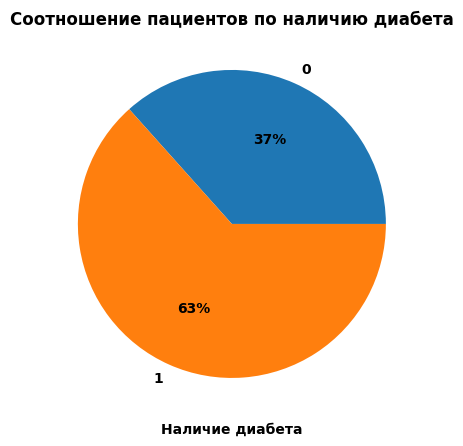

,count_of_employers,share_of_employers
diabetes,,
1,5505,63.39
0,3180,36.61


In [23]:
# построение пай-чарта по соотношению пациентов в контексте наличия диабета
display_info(train_data, 'diabetes', 'Соотношение пациентов по наличию диабета', 'Наличие диабета', 'pie')

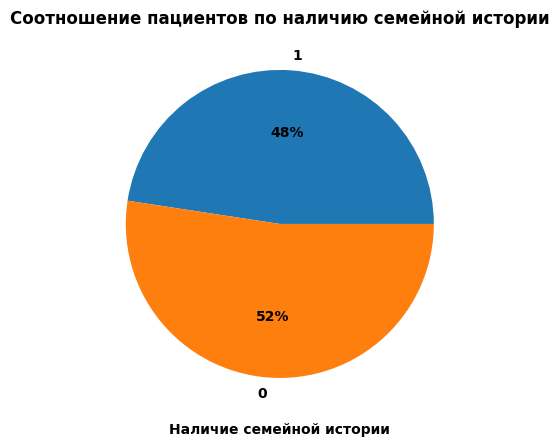

,count_of_employers,share_of_employers
family_history,,
0,4552,52.41
1,4133,47.59


In [25]:
# построение пай-чарта по соотношению пациентов в контексте наличия семейной истории
display_info(train_data, 'family_history', 'Соотношение пациентов по наличию семейной истории', 'Наличие семейной истории', 'pie')

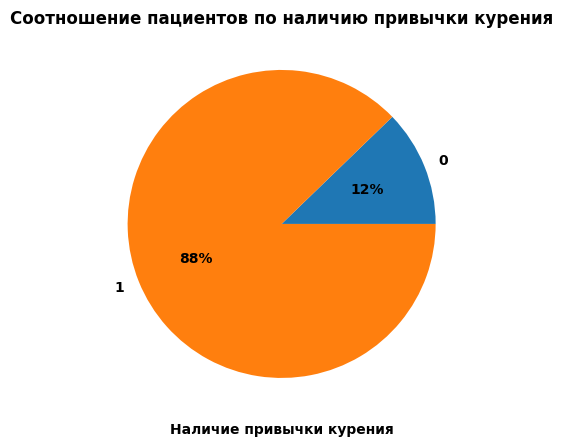

,count_of_employers,share_of_employers
smoking,,
1,7622,87.76
0,1063,12.24


In [26]:
# построение пай-чарта по соотношению пациентов в контексте наличия привычки курения
display_info(train_data, 'smoking', 'Соотношение пациентов по наличию привычки курения', 'Наличие привычки курения', 'pie')

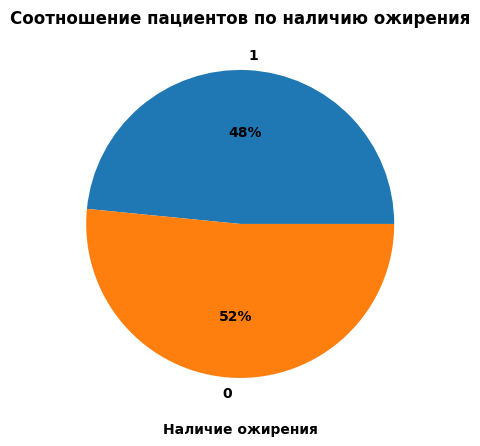

,count_of_employers,share_of_employers
obesity,,
0,4478,51.56
1,4207,48.44


In [27]:
# построение пай-чарта по соотношению пациентов в контексте наличия ожирения
display_info(train_data, 'obesity', 'Соотношение пациентов по наличию ожирения', 'Наличие ожирения', 'pie')

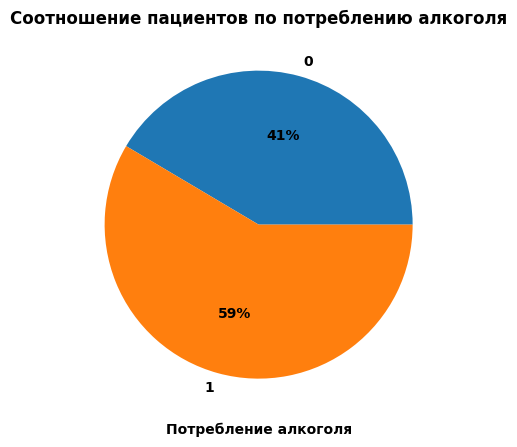

,count_of_employers,share_of_employers
alcohol_consumption,,
1,5082,58.51
0,3603,41.49


In [28]:
# построение пай-чарта по соотношению пациентов в контексте потребления алкоголя
display_info(train_data, 'alcohol_consumption', 'Соотношение пациентов по потреблению алкоголя', 'Потребление алкоголя', 'pie')

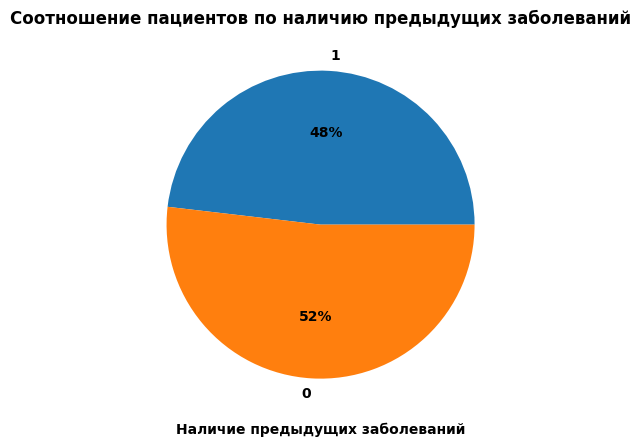

,count_of_employers,share_of_employers
previous_heart_problems,,
0,4503,51.85
1,4182,48.15


In [29]:
# построение пай-чарта по соотношению пациентов в контексте наличия предыдущих заболеваний сердца
display_info(train_data, 'previous_heart_problems', 'Соотношение пациентов по наличию предыдущих заболеваний', 'Наличие предыдущих заболеваний', 'pie')

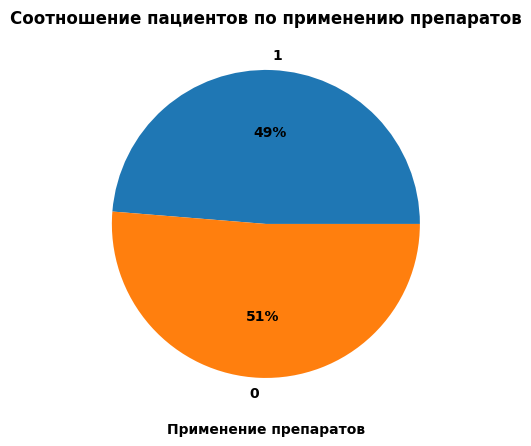

,count_of_employers,share_of_employers
medication_use,,
0,4454,51.28
1,4231,48.72


In [30]:
# построение пай-чарта по соотношению пациентов в контексте применения препаратов
display_info(train_data, 'medication_use', 'Соотношение пациентов по применению препаратов', 'Применение препаратов', 'pie')

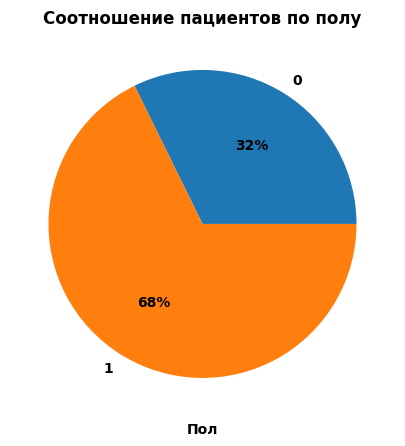

,count_of_employers,share_of_employers
gender,,
1,5882,67.73
0,2803,32.27


In [31]:
# построение пай-чарта по соотношению пациентов в контексте пола
display_info(train_data, 'gender', 'Соотношение пациентов по полу', 'Пол', 'pie')


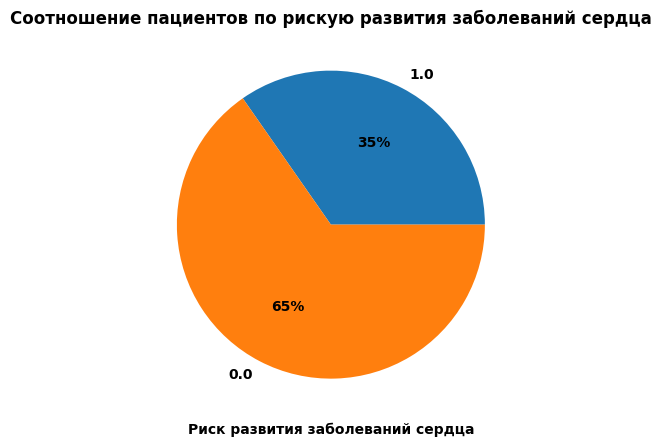

,count_of_employers,share_of_employers
heart_attack_risk_(binary),,
0.00,5672,65.31
1.00,3013,34.69


In [33]:
# построение пай-чарта по соотношению пациентов в контексте риска развития заболеваний сердца
display_info(train_data, 'heart_attack_risk_(binary)', 'Соотношение пациентов по рискую развития заболеваний сердца', 'Риск развития заболеваний сердца', 'pie')

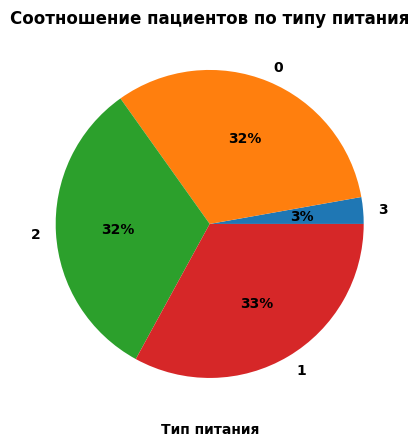

,count_of_employers,share_of_employers
diet,,
1,2863,32.96
2,2796,32.19
0,2783,32.04
3,243,2.80


In [34]:
# построение пай-чарта по соотношению пациентов в контексте типов питания пациентов
display_info(train_data, 'diet', 'Соотношение пациентов по типу питания', 'Тип питания', 'pie')

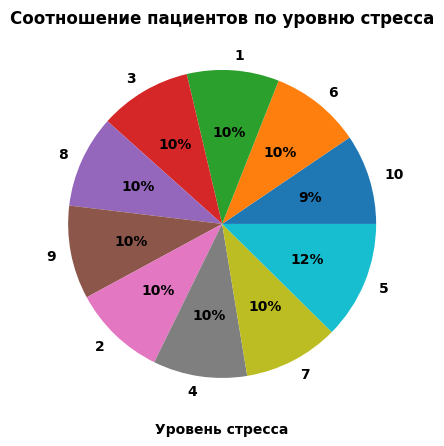

,count_of_employers,share_of_employers
stress_level,,
5,1076,12.39
7,869,10.01
...,...,...
6,828,9.53
10,824,9.49


In [36]:
# построение пай-чарта по соотношению пациентов в контексте уровня стресса
display_info(train_data, 'stress_level', 'Соотношение пациентов по уровню стресса', 'Уровень стресса', 'pie')

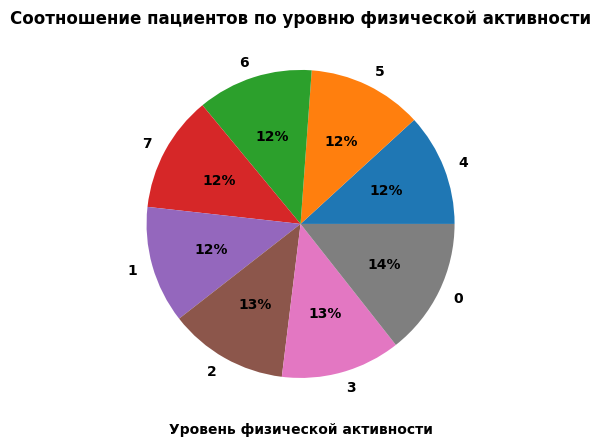

,count_of_employers,share_of_employers
physical_activity_days_per_week,,
0,1249,14.38
3,1091,12.56
...,...,...
5,1046,12.04
4,1025,11.80


In [37]:
# построение пай-чарта по соотношению пациентов в контексте уровня физической активности
display_info(train_data, 'physical_activity_days_per_week', 'Соотношение пациентов по уровню физической активности', 'Уровень физической активности', 'pie')

**Вывод по промежуточному этапу**

